# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [42]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

In [45]:
%run -i smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
epsilon = 0.9700; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
-39.0369868766
Agent previous state: ('right', 'red', 'forward', None, 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.24)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
-38.7405730886
Agent previous state: ('right', 'red', 'left', 'forward', 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.94)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.1177701045
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 2.18)
85% of time remaining to reach destination.

/-----------

Agent previous state: ('forward', 'red', None, 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.33)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.92665110557
Agent previous state: ('forward', 'red', 'forward', None, 'forward')
Agent properly idled at a red light. (rewarded 1.99)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
-5.7744375736
Agent previous state: ('forward', 'green', None, 'forward', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.95)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
-5.64358859307
Agent previous state: ('forward', 'green', None, 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.82)
50% of time remaini

Agent previous state: ('left', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.55)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
2.55087442711
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.60)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
-5.61662416044
Agent previous state: ('left', 'green', 'right', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.79)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
-4.46921387055
Agent previous state: ('left', 'green', None, 'left', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.61)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

le

Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 0.38)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.64199000853
Agent previous state: ('left', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.69)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
0.895329781389
Agent previous state: ('left', 'red', 'right', None, 'forward')
Agent properly idled at a red light. (rewarded 0.90)
66% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
-0.031442835949
Agent previous state: ('left', 'red', None, 'right', 'left')
Agent drove right instead of left. (rewarded -0.03)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
0.318896773335


Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.25)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 7
\-------------------------

Simulating trial. . . 
epsilon = 0.8080; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.20290272194
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.16)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.16124050063
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.19)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.0701450248
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red lig

/-------------------
| Step 10 Results
\-------------------

learned value
0.110951596662
Agent previous state: ('left', 'green', None, None, None)
Agent drove right instead of left. (rewarded 0.11)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
0.280679887805
Agent previous state: ('left', 'red', 'left', 'left', 'left')
Agent drove right instead of left. (rewarded 0.29)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.13773757033
Agent previous state: ('right', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.17)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.06687334112
Agent previous state: ('right', 'green', None, None, None)
Agent drove forward instead of right. (rewarded 1.07)
30% of time remaining to reach destination.

/--------------


/-------------------
| Step 2 Results
\-------------------

learned value
0.884535180378
Agent previous state: ('right', 'green', 'forward', None, 'left')
Agent drove forward instead of right. (rewarded 0.91)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.87746909007
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.89)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
-39.5224989336
Agent previous state: ('forward', 'red', 'forward', 'left', 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.74)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
-10.4822515177
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent attempted driving forward through


/-------------------
| Step 18 Results
\-------------------

learned value
0.33432661157
Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 0.27)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
0.93143040053
Agent previous state: ('forward', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 0.96)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 12
\-------------------------

Simulating trial. . . 
epsilon = 0.6938; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
0.395926274975
Agent previous state: ('right', 'red', None, 'left', 'right')
Agent properly idled at a red light. (rewarded 0.41)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

lea


/-------------------
| Step 0 Results
\-------------------

learned value
1.24070834169
Agent previous state: ('right', 'red', None, 'left', None)
Agent followed the waypoint right. (rewarded 1.23)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.76465392137
Agent previous state: ('right', 'green', 'forward', None, None)
Agent drove left instead of right. (rewarded 1.77)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.39011246351
Agent previous state: ('right', 'green', None, 'forward', None)
Agent drove left instead of right. (rewarded 1.39)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
0.189084545785
Agent previous state: ('left', 'green', None, None, 'right')
Agent drove forward instead of left. (rewarded 0.18)
84% of time remaining to reach destination.

/-----------


/-------------------
| Step 11 Results
\-------------------

learned value
1.24032506235
Agent previous state: ('forward', 'red', None, None, 'left')
Agent drove right instead of forward. (rewarded 1.24)
66% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
-5.77586081623
Agent previous state: ('left', 'green', 'left', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.95)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
0.798983854687
Agent previous state: ('left', 'green', 'left', None, 'right')
Agent drove right instead of left. (rewarded 0.82)
60% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.47656128757
Agent previous state: ('forward', 'green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.50)
57% of time remaining 

Agent previous state: ('right', 'green', 'forward', None, 'right')
Agent followed the waypoint right. (rewarded 2.13)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
0.952413397648
Agent previous state: ('right', 'green', None, None, None)
Agent drove forward instead of right. (rewarded 0.94)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
1.46466830221
Agent previous state: ('right', 'green', None, None, None)
Agent drove forward instead of right. (rewarded 1.48)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.74329999414
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.72)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
-9.13268270879
Agent prev

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.79)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.74079719753
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.76)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.57304226838
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.57)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
-20.0953910925
Agent previous state: ('right', 'green', 'right', None, 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.72)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\----------------


/-------------------
| Step 9 Results
\-------------------

learned value
0.9277950043
Agent previous state: ('right', 'green', None, 'forward', None)
Agent drove left instead of right. (rewarded 0.90)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
-39.3178105401
Agent previous state: ('right', 'red', 'right', 'forward', 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.53)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.59827775334
Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.61)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
0.57929630757
Agent previous state: ('right', 'green', None, None, 'right')
Agent drove forward instead of right. (rewarded


/-------------------
| Step 16 Results
\-------------------

learned value
0.697874061401
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.68)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
1.9627258847
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.97)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
1.3210383364
Agent previous state: ('forward', 'green', 'right', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.36)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
0.18130051798
Agent previous state: ('forward', 'red', None, None, 'left')
Agent drove right instead of forward. (rewarded 0.13)
0% of time remaining to reach destination.

Tri

Agent previous state: ('forward', 'green', 'forward', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.19)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
0.280893010276
Agent previous state: ('forward', 'red', None, None, 'left')
Agent drove right instead of forward. (rewarded 0.28)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.88407081018
Agent previous state: ('left', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.93)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.17824428756
Agent previous state: ('left', 'red', None, 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.25)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
-18.985508


/-------------------
| Step 3 Results
\-------------------

learned value
0.683325787658
Agent previous state: ('left', 'red', None, 'right', 'forward')
Agent drove right instead of left. (rewarded 0.70)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.62074195728
Agent previous state: ('right', 'green', None, None, 'forward')
Agent followed the waypoint right. (rewarded 1.64)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
0.731456922171
Agent previous state: ('right', 'green', None, None, 'right')
Agent drove forward instead of right. (rewarded 0.74)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
-0.0549447497767
Agent previous state: ('right', 'green', 'left', None, None)
Agent drove left instead of right. (rewarded -0.10)
65% of time remaining to reach destination.

/--


/-------------------
| Step 3 Results
\-------------------

learned value
1.11119985294
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.08)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.46526212356
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.48)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.23513893438
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.26)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.85552640089
Agent previous state: ('forward', 'green', None, 'left', 'left')
Agent followed the waypoint forward. (rewarded 2.89)
72% of time remaining to reach destination.

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.12)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.06477734413
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.06)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
2.35397884187
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.39)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.35446090937
Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.36)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
1.68545265029
Agent previo


/-------------------
| Step 2 Results
\-------------------

learned value
1.29704635477
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.26)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.35284902563
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.35)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.02589637123
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.02)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
0.0969317252307
Agent previous state: ('forward', 'red', 'right', None, None)
Agent drove right instead of forward. (rewarded 0.10)
76% of time remaining to reach destination.

/-------


/-------------------
| Step 9 Results
\-------------------

learned value
1.16032310344
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.16)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
0.866994863494
Agent previous state: ('forward', 'green', 'right', 'right', None)
Agent followed the waypoint forward. (rewarded 0.83)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.83512394604
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.81)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
-39.1195557821
Agent previous state: ('forward', 'red', 'forward', 'right', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major acc


/-------------------
| Step 3 Results
\-------------------

learned value
2.46680735817
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.47)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.06013122037
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.01)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.03587264205
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 2.03)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.88125873547
Agent previous state: ('right', 'red', None, 'forward', None)
Agent followed the waypoint right. (rewarded 1.86)
65% of time remaining to reach destination.

/-----------


/-------------------
| Step 4 Results
\-------------------

learned value
1.12863616272
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.07)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
0.988754900195
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 0.98)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.68393383141
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.65)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.25602914713
Agent previous state: ('forward', 'green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 2.26)
73% of time remaining to reach destinat

Agent previous state: ('forward', 'red', 'left', 'forward', 'left')
Agent drove right instead of forward. (rewarded 1.21)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
-18.6633155328
Agent previous state: ('left', 'red', 'forward', 'forward', 'left')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.24)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.28970010066
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.27)
30% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 38
\-------------------------

Simulating trial. . . 
epsilon = 0.3143; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.74415121677
Agent previous state: ('r


/-------------------
| Step 0 Results
\-------------------

learned value
-19.0721377524
Agent previous state: ('left', 'green', None, 'right', 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.66)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.71176665793
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.68)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.12894335337
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.09)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.08120799074
Agent previous state: ('right', 'red', None, 'left', None)
Agent followed the waypoint right. (rewarded 2.07)
80% of time remaining 

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 0.92)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.5884091977
Agent previous state: ('forward', 'green', None, 'left', 'forward')
Agent drove right instead of forward. (rewarded 1.64)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
0.991379413707
Agent previous state: ('left', 'red', None, 'left', 'left')
Agent drove right instead of left. (rewarded 1.01)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
-38.2144914366
Agent previous state: ('right', 'red', 'forward', 'right', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.40)
40% of time remaining to reach destination.

/-------------------
| Step 12 Resul

/-------------------
| Step 14 Results
\-------------------

learned value
2.34928315558
Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 2.39)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
-0.0946475910754
Agent previous state: ('forward', 'red', 'left', 'forward', None)
Agent drove right instead of forward. (rewarded -0.10)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
0.990146951542
Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 0.96)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
-10.2831107868
Agent previous state: ('left', 'red', 'right', None, None)
Agent attempted driving forward through a red light. (rewarded -10.60)
28% of time remaining to reac


/-------------------
| Step 4 Results
\-------------------

learned value
1.3847369002
Agent previous state: ('left', 'green', None, 'forward', None)
Agent drove right instead of left. (rewarded 1.41)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.57472048057
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.57)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.33697877549
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.33)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.00600840113
Agent previous state: ('forward', 'green', 'left', None, 'left')
Agent followed the waypoint forward. (rewarded 2.04)
68% of time remaining to reach destination.

/-


/-------------------
| Step 11 Results
\-------------------

learned value
1.25741027768
Agent previous state: ('forward', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.24)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
2.03554010651
Agent previous state: ('forward', 'red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.02)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.20998568093
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.23)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.50433666626
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.52)
40% of time remaining to reach destination


/-------------------
| Step 19 Results
\-------------------

learned value
0.960881181017
Agent previous state: ('right', 'red', 'right', 'left', None)
Agent properly idled at a red light. (rewarded 0.99)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 50
\-------------------------

Simulating trial. . . 
epsilon = 0.2181; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.37156145838
Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.38)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.58893601127
Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.63)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned val

\-------------------

learned value
1.91786682225
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.93)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.72160141202
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.72)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.60542842
Agent previous state: ('left', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 2.62)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.25862176844
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.27)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

l


/-------------------
| Step 4 Results
\-------------------

learned value
2.15527577003
Agent previous state: ('forward', 'green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.18)
75% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 56
\-------------------------

Simulating trial. . . 
epsilon = 0.1816; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.72788023272
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.75)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.71360738687
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.71)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value


Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.21)
76% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 58
\-------------------------

Simulating trial. . . 
epsilon = 0.1709; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.45758508175
Agent previous state: ('right', 'red', 'left', 'left', 'left')
Agent followed the waypoint right. (rewarded 1.50)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.23490094749
Agent previous state: ('forward', 'red', 'left', None, 'left')
Agent properly idled at a red light. (rewarded 2.27)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
0.00500801017538
Agent previous state: ('forward', 'red', None, None, 'left')
Agent d

Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 2.07)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 60
\-------------------------

Simulating trial. . . 
epsilon = 0.1608; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
-9.39869874863
Agent previous state: ('left', 'red', 'left', 'left', 'forward')
Agent attempted driving forward through a red light. (rewarded -9.69)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.75658697319
Agent previous state: ('left', 'red', None, 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.75)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.2471604039
Agent previous state: ('left', 'red', 'forward', None

/-------------------
| Step 14 Results
\-------------------

learned value
-0.226951638887
Agent previous state: ('forward', 'green', 'right', None, None)
Agent drove left instead of forward. (rewarded -0.28)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.3310611061
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.36)
20% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 62
\-------------------------

Simulating trial. . . 
epsilon = 0.1513; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.05444115916
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.05)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.1085100


/-------------------
| Step 4 Results
\-------------------

learned value
0.505365506473
Agent previous state: ('left', 'green', None, 'forward', 'right')
Agent drove forward instead of left. (rewarded 0.52)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.05496242344
Agent previous state: ('forward', 'red', 'forward', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.12)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.80024807486
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.80)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.967757656007
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 0.94)
68% of time remaining to reach destination


/-------------------
| Step 16 Results
\-------------------

learned value
-0.343139345087
Agent previous state: ('left', 'red', None, None, 'left')
Agent drove right instead of left. (rewarded -0.36)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
-0.372767480091
Agent previous state: ('right', 'green', None, 'forward', None)
Agent drove forward instead of right. (rewarded -0.42)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
0.938585468335
Agent previous state: ('right', 'green', None, 'right', 'left')
Agent drove left instead of right. (rewarded 0.96)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
0.90622888309
Agent previous state: ('left', 'green', None, 'left', None)
Agent followed the waypoint left. (rewarded 0.86)
0% of time remaining to reach destination.

Trial 


/-------------------
| Step 2 Results
\-------------------

learned value
2.78739859629
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.85)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.62793236218
Agent previous state: ('forward', 'green', 'left', None, 'left')
Agent followed the waypoint forward. (rewarded 1.62)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.22136147638
Agent previous state: ('forward', 'green', 'forward', 'left', 'forward')
Agent followed the waypoint forward. (rewarded 1.26)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.14207033096
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.18)
76% of time remaining to reach destination


/-------------------
| Step 3 Results
\-------------------

learned value
2.36944768242
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.36)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.38098514206
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 1.38)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.67187724903
Agent previous state: ('forward', 'green', 'left', None, 'left')
Agent followed the waypoint forward. (rewarded 2.70)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.59976871803
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.60)
72% of time remaining to reach destination.

/----

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.61)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.74373806378
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.73)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.935407737411
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 0.91)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
-37.8729550807
Agent previous state: ('forward', 'red', 'right', None, 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.04)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\---


/-------------------
| Step 1 Results
\-------------------

learned value
2.47538264123
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 2.50)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.94029451442
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.97)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.52709966233
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.51)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.568894222
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.56)
80% of time remaining to reach destination.

/------------

Agent previous state: ('left', 'green', 'left', None, None)
Agent drove right instead of left. (rewarded 0.94)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.31214204482
Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 1.33)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.62063858487
Agent previous state: ('forward', 'green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.59)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.03064166996
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.01)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.26503737505
Agent p


/-------------------
| Step 2 Results
\-------------------

learned value
-4.68934833808
Agent previous state: ('forward', 'green', 'forward', 'forward', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.83)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.04415144106
Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.03)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
0.108616732333
Agent previous state: ('left', 'green', 'forward', 'forward', 'right')
Agent drove forward instead of left. (rewarded 0.11)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
-39.2251391379
Agent previous state: ('left', 'red', 'forward', 'left', None)
Agent attempted driving forward through a red light w


/-------------------
| Step 2 Results
\-------------------

learned value
2.24066761801
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.26)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.51213437191
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.52)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.84386819392
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.90)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.54619729392
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.51)
76% of time remaining to reach destination.

/--------------

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.13)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.895110902874
Agent previous state: ('right', 'red', None, 'left', None)
Agent followed the waypoint right. (rewarded 0.86)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
2.64876515835
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.65)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.67114787153
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.64)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.42028769195
Agent pr

Agent previous state: ('forward', 'green', 'forward', None, 'left')
Agent drove left instead of forward. (rewarded 0.41)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

learned value
0.943049987475
Agent previous state: ('right', 'red', 'left', 'left', None)
Agent followed the waypoint right. (rewarded 0.94)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

learned value
1.46336262836
Agent previous state: ('right', 'red', 'left', None, None)
Agent followed the waypoint right. (rewarded 1.49)
4% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 87
\-------------------------

Simulating trial. . . 
epsilon = 0.0707; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.17579132941
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly 

\-------------------------

Simulating trial. . . 
epsilon = 0.0665; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
-4.79880435521
Agent previous state: ('left', 'green', 'forward', 'forward', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.95)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.60949680134
Agent previous state: ('left', 'green', 'forward', 'forward', 'left')
Agent followed the waypoint left. (rewarded 2.69)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.67026051814
Agent previous state: ('forward', 'green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1.65)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
0.0959420335814
Agent previous state: ('right', 'red', None,

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.08)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
2.09841215454
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.12)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.24958204622
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.25)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.38196473804
Agent previous state: ('forward', 'red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.42)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.909518

Agent properly idled at a red light. (rewarded 1.54)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.11009365375
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.14)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.62619869054
Agent previous state: ('forward', 'red', 'left', 'left', 'forward')
Agent drove right instead of forward. (rewarded 1.68)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.12330516625
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.16)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
0.0348381121601
Agent previous state: ('right', 'green', 'left', 'forward', None)
Age


/-------------------
| Step 4 Results
\-------------------

learned value
1.3277820074
Agent previous state: ('left', 'green', None, 'left', 'left')
Agent drove right instead of left. (rewarded 1.32)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.36027559112
Agent previous state: ('right', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.38)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.73400215379
Agent previous state: ('right', 'red', None, 'left', None)
Agent followed the waypoint right. (rewarded 2.73)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.51500147774
Agent previous state: ('right', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.54)
73% of time remaining to reach destination.

/--------------


/-------------------
| Step 11 Results
\-------------------

learned value
1.27878042914
Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 1.32)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
2.7223871938
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.72)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.35129941854
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 2.34)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.03879325893
Agent previous state: ('left', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.03)
50% of time remaining to reach destination.

/--------------


/-------------------
| Step 14 Results
\-------------------

learned value
2.1310349704
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.14)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.7536748949
Agent previous state: ('left', 'green', 'forward', None, None)
Agent followed the waypoint left. (rewarded 1.77)
20% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 99
\-------------------------

Simulating trial. . . 
epsilon = 0.0490; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.16751401535
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.15)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.22110237


/-------------------
| Step 4 Results
\-------------------

learned value
2.56097576854
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.59)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.6568785083
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 2.68)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
0.985905267885
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 0.93)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.82177449961
Agent previous state: ('forward', 'red', None, 'right', 'left')
Agent properly idled at a red light. (rewarded 2.86)
68% of time remaining to reach destination.

/


/-------------------
| Step 2 Results
\-------------------

learned value
0.3260895098
Agent previous state: ('forward', 'red', 'right', None, None)
Agent drove right instead of forward. (rewarded 0.28)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
0.587676470145
Agent previous state: ('left', 'red', None, 'left', 'left')
Agent drove right instead of left. (rewarded 0.57)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.85528502976
Agent previous state: ('right', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.87)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.8445781775
Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 1.88)
70% of time remaining to reach destination.

/-----------------

Agent previous state: ('right', 'green', 'forward', 'forward', None)
Agent followed the waypoint right. (rewarded 2.15)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
0.790119976015
Agent previous state: ('left', 'green', None, None, 'right')
Agent drove right instead of left. (rewarded 0.79)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

learned value
1.79319718869
Agent previous state: ('right', 'red', None, 'right', None)
Agent followed the waypoint right. (rewarded 1.79)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

learned value
1.47124688976
Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 1.46)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

learned value
1.67764047353
Agent prev

Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 2.21)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 109
\-------------------------

Simulating trial. . . 
epsilon = 0.0362; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.74771957186
Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.73)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.21635695172
Agent previous state: ('forward', 'red', 'left', None, 'left')
Agent properly idled at a red light. (rewarded 1.19)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.65404820106
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly 


/-------------------
| Step 12 Results
\-------------------

learned value
1.95574310882
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.95)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.40929791728
Agent previous state: ('left', 'green', None, 'right', None)
Agent followed the waypoint left. (rewarded 2.44)
53% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 112
\-------------------------

Simulating trial. . . 
epsilon = 0.0330; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.89853765434
Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 2.92)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.710


/-------------------
| Step 3 Results
\-------------------

learned value
0.730536592294
Agent previous state: ('left', 'green', 'forward', 'left', None)
Agent drove right instead of left. (rewarded 0.74)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.53734414752
Agent previous state: ('right', 'green', None, 'left', None)
Agent drove forward instead of right. (rewarded 1.58)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
0.602772245967
Agent previous state: ('right', 'green', None, 'left', None)
Agent drove forward instead of right. (rewarded 0.57)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
-4.49786713681
Agent previous state: ('forward', 'green', 'forward', 'right', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.64)
65% of time remainin


/-------------------
| Step 12 Results
\-------------------

learned value
2.36100596268
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 2.38)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.01989820245
Agent previous state: ('right', 'red', 'left', 'forward', None)
Agent followed the waypoint right. (rewarded 2.04)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
0.930015031918
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.91)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.24738315596
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.25)
20% of time remaining to reach destination.

Trial Compl


/-------------------
| Step 2 Results
\-------------------

learned value
2.12598530318
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.16)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.44813091459
Agent previous state: ('forward', 'green', 'left', 'left', 'forward')
Agent drove right instead of forward. (rewarded 1.49)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.0326026437
Agent previous state: ('left', 'red', 'right', 'right', None)
Agent properly idled at a red light. (rewarded 2.10)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.79607016324
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.82)
76% of time remaining to reach destination.

/--------


/-------------------
| Step 17 Results
\-------------------

learned value
1.37111964513
Agent previous state: ('right', 'green', None, 'left', None)
Agent drove forward instead of right. (rewarded 1.39)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
0.943260510285
Agent previous state: ('right', 'green', None, 'left', None)
Agent drove forward instead of right. (rewarded 0.93)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
1.33853187378
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.31)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

learned value
1.73549478317
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.75)
16% of time remaining to reach destination.

Trial Completed!

/-------------------
| Step 9 Results
\-------------------

learned value
1.38841358042
Agent previous state: ('forward', 'red', None, 'right', None)
Agent properly idled at a red light. (rewarded 1.38)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.09421136976
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 2.12)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
2.10879238114
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 2.09)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
2.27483304176
Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.30)
48% of time remaining to reach destination.

/-

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 0.91)
56% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 128
\-------------------------

Simulating trial. . . 
epsilon = 0.0203; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.26824680057
Agent previous state: ('left', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.22)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.13288157267
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.11)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.32859645918
Agent previous state: ('left', 'red', None, 'forward', None)
Agent properly idled 


/-------------------
| Step 3 Results
\-------------------

learned value
2.78940641037
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 2.83)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.44730284944
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.48)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.50746645511
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.48)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.00197618956
Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.04)
65% of time remaining to reach destination.

/----------


/-------------------
| Step 0 Results
\-------------------

learned value
-18.7402568378
Agent previous state: ('right', 'red', 'forward', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.32)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.98946868578
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 2.00)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.55185891926
Agent previous state: ('forward', 'red', None, 'right', 'forward')
Agent properly idled at a red light. (rewarded 2.55)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.29567422711
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.31)
84% of 

Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 2.10)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.24964138074
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.25)
57% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 135
\-------------------------

Simulating trial. . . 
epsilon = 0.0164; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
0.685286096517
Agent previous state: ('right', 'red', 'forward', 'forward', 'left')
Agent properly idled at a red light. (rewarded 0.71)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
-39.055890027
Agent previous state: ('right', 'red', 'forward', None, 'left')
Agent a


/-------------------
| Step 3 Results
\-------------------

learned value
1.52536297646
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.50)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.34962849754
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.34)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
0.380947911415
Agent previous state: ('forward', 'green', 'right', None, 'left')
Agent drove left instead of forward. (rewarded 0.35)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.93442471292
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.93)
72% of time remaining to reach destination.

/----------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.78)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.34594065613
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.35)
20% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 140
\-------------------------

Simulating trial. . . 
epsilon = 0.0141; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
-5.08140862535
Agent previous state: ('left', 'green', 'forward', 'forward', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.24)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.45101795366
Agent previous state: ('left', 'green', 'forward', 'for


/-------------------
| Step 1 Results
\-------------------

learned value
1.23144201417
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.24)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.28520272866
Agent previous state: ('left', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.29)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.65120462021
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.70)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.72613702853
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.70)
75% of time remaining to reach destination.

/-------------------
| Step 

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.47)
66% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 146
\-------------------------

Simulating trial. . . 
epsilon = 0.0117; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.76544013299
Agent previous state: ('right', 'red', None, 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.79)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
-10.3614939151
Agent previous state: ('right', 'red', 'right', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.68)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
0.918160951801
Agent previous state: ('right', 'red', None, 'lef


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 148
\-------------------------

Simulating trial. . . 
epsilon = 0.0110; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.00589710211
Agent previous state: ('right', 'red', None, 'left', None)
Agent followed the waypoint right. (rewarded 2.01)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.718458273
Agent previous state: ('forward', 'red', 'right', None, None)
Agent drove right instead of forward. (rewarded 1.73)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.74118742553
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.74)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.7954033614


/-------------------
| Step 0 Results
\-------------------

learned value
0.317149101835
Agent previous state: ('left', 'green', 'left', 'left', None)
Agent drove forward instead of left. (rewarded 0.27)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.35841928526
Agent previous state: ('left', 'green', None, 'forward', None)
Agent drove right instead of left. (rewarded 1.39)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.49759873936
Agent previous state: ('right', 'green', None, 'forward', None)
Agent followed the waypoint right. (rewarded 2.51)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.58627807357
Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.57)
84% of time remaining to reach destination.

/------

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 0.83)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
-0.0375479114962
Agent previous state: ('left', 'green', None, 'right', 'forward')
Agent drove forward instead of left. (rewarded -0.08)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
2.24424246475
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.28)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
1.56539360951
Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.56)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
1.45168378581
Agent

/-------------------
| Step 7 Results
\-------------------

learned value
2.60061226931
Agent previous state: ('right', 'green', 'forward', None, 'right')
Agent followed the waypoint right. (rewarded 2.62)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 156
\-------------------------

Simulating trial. . . 
epsilon = 0.0086; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
-10.6537640164
Agent previous state: ('forward', 'red', 'left', 'left', 'left')
Agent attempted driving left through a red light. (rewarded -10.98)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.73785614607
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.73)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\--------------


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 159
\-------------------------

Simulating trial. . . 
epsilon = 0.0079; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.22069684221
Agent previous state: ('left', 'green', 'left', 'forward', 'right')
Agent drove right instead of left. (rewarded 1.22)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.52673125159
Agent previous state: ('forward', 'green', None, 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.52)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.57233815137
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.62)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned

Agent followed the waypoint forward. (rewarded 1.88)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.04320640881
Agent previous state: ('forward', 'red', 'left', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.08)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
1.88273466163
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.88)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.36194899441
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.35)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
0.590355143386
Agent previous state: ('forward', 'red', None, None, 'left')
Age

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.22)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.00246693533
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.97)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.23347739214
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 2.23)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
0.825512115252
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 0.78)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
-0.319047200428
Agent 


/-------------------
| Step 0 Results
\-------------------

learned value
2.10612869388
Agent previous state: ('left', 'green', None, 'right', None)
Agent followed the waypoint left. (rewarded 2.17)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.81372040079
Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 2.82)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.14091781655
Agent previous state: ('right', 'green', None, 'forward', 'left')
Agent followed the waypoint right. (rewarded 2.16)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.83014481006
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.84)
80% of time remaining to reach destination.

/---------

Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.86)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
2.33179078212
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.34)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
0.647008992359
Agent previous state: ('left', 'red', 'right', 'forward', None)
Agent drove right instead of left. (rewarded 0.66)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.41104501311
Agent previous state: ('left', 'green', 'left', 'left', None)
Agent drove forward instead of left. (rewarded 1.43)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
0.962112016472
Agent previo

Agent previous state: ('left', 'red', 'right', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.96)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.92372194582
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.91)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
0.753790189341
Agent previous state: ('left', 'green', 'forward', None, 'left')
Agent followed the waypoint left. (rewarded 0.72)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
0.918571735514
Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 0.93)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
0.2016

Agent previous state: ('right', 'red', 'forward', None, 'forward')
Agent properly idled at a red light. (rewarded 0.04)
49% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
1.22759678767
Agent previous state: ('right', 'red', 'left', None, 'forward')
Agent followed the waypoint right. (rewarded 1.19)
46% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
1.78640039586
Agent previous state: ('left', 'red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 1.80)
43% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

learned value
2.40844713007
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.45)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

learned value
1.4397269214
Agent

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.42)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.16844116674
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.12)
67% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 176
\-------------------------

Simulating trial. . . 
epsilon = 0.0047; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
-9.58319289591
Agent previous state: ('right', 'red', 'right', 'left', 'left')
Agent attempted driving left through a red light. (rewarded -9.88)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.09464858562
Agent previous state: ('right', 'red', None, None, 'left')
Agent f


/-------------------
| Step 5 Results
\-------------------

learned value
2.65396673562
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.69)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.2986715566
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.28)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.87238282937
Agent previous state: ('left', 'red', None, 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.92)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
2.27699015405
Agent previous state: ('left', 'red', None, 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.26)
74% of time remaining to reach destination.

/-----


/-------------------
| Step 3 Results
\-------------------

learned value
2.21966044351
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.25)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.50629855739
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.48)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.64529643061
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.66)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.10194136185
Agent previous state: ('forward', 'green', 'left', 'forward', 'forward')
Agent followed the waypoint forward. (rewarded 2.11)
65% of time remaining to reach desti

Agent previous state: ('forward', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 0.85)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
-0.0975880007196
Agent previous state: ('forward', 'red', 'right', None, None)
Agent drove right instead of forward. (rewarded -0.12)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.62789237972
Agent previous state: ('left', 'red', 'forward', 'right', None)
Agent properly idled at a red light. (rewarded 1.61)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.35677915575
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.34)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.89997757162
A

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.11)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
0.329243698984
Agent previous state: ('left', 'green', 'left', 'forward', None)
Agent drove right instead of left. (rewarded 0.32)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
2.66685641471
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 2.67)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.3630062305
Agent previous state: ('right', 'red', 'left', None, 'right')
Agent followed the waypoint right. (rewarded 1.36)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.35333770293
Agent previous sta


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 189
\-------------------------

Simulating trial. . . 
epsilon = 0.0032; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
0.051281096686
Agent previous state: ('forward', 'green', None, 'forward', 'left')
Agent drove left instead of forward. (rewarded 0.05)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.75083264466
Agent previous state: ('right', 'red', None, 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.75)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.81046389955
Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 2.81)
91% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learn

learned value
0.305040586236
Agent previous state: ('right', 'green', 'forward', 'left', 'left')
Agent drove left instead of right. (rewarded 0.31)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
0.866400088651
Agent previous state: ('right', 'green', None, None, 'forward')
Agent followed the waypoint right. (rewarded 0.83)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
1.53761706478
Agent previous state: ('right', 'red', None, 'left', None)
Agent followed the waypoint right. (rewarded 1.51)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
1.30798637297
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.30)
10% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/---------------

/-------------------
| Step 8 Results
\-------------------

learned value
2.02447752147
Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.01)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
2.38229048414
Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.39)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.15315774994
Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.12)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
0.706193296697
Agent previous state: ('left', 'green', 'left', None, 'forward')
Agent drove right instead of left. (rewarded 0.71)
40% of time remaining to reach destination.

/------


/-------------------
| Step 2 Results
\-------------------

learned value
1.95632877225
Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.99)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.33082284058
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.30)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.17173207714
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.19)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.62102845935
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.62)
80% of time remaining to reach destination.

/


/-------------------
| Step 5 Results
\-------------------

learned value
1.03637646969
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.03)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.65221454011
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.67)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.18927500123
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.18)
68% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 200
\-------------------------

Simulating trial. . . 
epsilon = 0.0023; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value



/-------------------
| Step 1 Results
\-------------------

learned value
2.71904135071
Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 2.73)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.86682710006
Agent previous state: ('forward', 'green', 'left', None, 'left')
Agent followed the waypoint forward. (rewarded 1.88)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.98609792408
Agent previous state: ('left', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.97)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.34849995703
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.35)
83% of time remaining to reach destination.

/-------


/-------------------
| Step 1 Results
\-------------------

learned value
1.82397567907
Agent previous state: ('left', 'red', None, 'right', None)
Agent properly idled at a red light. (rewarded 1.85)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.02102213965
Agent previous state: ('left', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 0.98)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.51170519628
Agent previous state: ('left', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 2.56)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.50113244448
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.51)
80% of time remaining to reach destination.

/-----------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.19)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.28851355744
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.32)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.96085172006
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.94)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.33803986052
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.31)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.73446134944
Agent pre

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.82)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.38660642514
Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.36)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.29581981721
Agent previous state: ('forward', 'green', None, 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.29)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 212
\-------------------------

Simulating trial. . . 
epsilon = 0.0016; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.10664767598
Agent previous state: ('right', 'green', 'left', 'forward', 'forward')
A


/-------------------
| Step 4 Results
\-------------------

learned value
1.84311097861
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.82)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.12103859248
Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 2.10)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.15269823898
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.14)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.14291231061
Agent previous state: ('left', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 1.18)
68% of time remaining to reach destination.

/--------------

Agent previous state: ('left', 'green', None, 'left', 'left')
Agent drove right instead of left. (rewarded 0.81)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.30563667089
Agent previous state: ('forward', 'red', 'right', None, 'forward')
Agent properly idled at a red light. (rewarded 1.35)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.520493504384
Agent previous state: ('forward', 'green', None, 'left', 'forward')
Agent drove right instead of forward. (rewarded 0.50)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
2.7680050323
Agent previous state: ('left', 'green', None, 'left', None)
Agent followed the waypoint left. (rewarded 2.80)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
-18.4728369211
Ag


/-------------------
| Step 3 Results
\-------------------

learned value
0.99814845028
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 0.97)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.08590360679
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 1.08)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.19854681256
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.19)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.62116630036
Agent previous state: ('forward', 'red', None, 'right', None)
Agent properly idled at a red light. (rewarded 2.62)
77% of time remaining to reach destination.

/-----


/-------------------
| Step 13 Results
\-------------------

learned value
0.797011039328
Agent previous state: ('forward', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 0.74)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
1.71780517651
Agent previous state: ('forward', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.75)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
0.536631653063
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 0.52)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
0.623841715064
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 0.58)
15% of time remaining to reach destin


/-------------------
| Step 4 Results
\-------------------

learned value
1.44603964129
Agent previous state: ('right', 'green', 'forward', None, None)
Agent followed the waypoint right. (rewarded 1.46)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.94162651206
Agent previous state: ('forward', 'red', 'forward', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.95)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.04875918683
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 1.03)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.22487592236
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 1.23)
68% of time remaining to reach destination.


Agent previous state: ('left', 'green', 'left', 'right', 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.09)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
0.951309097265
Agent previous state: ('left', 'green', 'left', None, None)
Agent followed the waypoint left. (rewarded 0.93)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.67809705477
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 2.73)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
2.08081758936
Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 2.09)
64% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/----------


/-------------------
| Step 3 Results
\-------------------

learned value
1.58566651089
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.56)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.36784160221
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.39)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.36495419977
Agent previous state: ('forward', 'red', 'right', None, 'forward')
Agent properly idled at a red light. (rewarded 1.37)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.82091620229
Agent previous state: ('forward', 'green', None, 'forward', 'forward')
Agent drove right instead of forward. (rewarded 1.84)
65% of time remaining to reach destination.


/-------------------
| Step 5 Results
\-------------------

learned value
1.18501912677
Agent previous state: ('forward', 'green', 'left', None, 'left')
Agent followed the waypoint forward. (rewarded 1.16)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.31403149147
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.32)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.08331128694
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.09)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 233
\-------------------------

Simulating trial. . . 
epsilon = 0.0008; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned va


/-------------------
| Step 3 Results
\-------------------

learned value
1.91792697867
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.94)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.55147327053
Agent previous state: ('forward', 'red', None, 'right', None)
Agent properly idled at a red light. (rewarded 1.57)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.38826650795
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.37)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.49376145114
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 2.53)
65% of time remaining to reach destination.

/-------


/-------------------
| Step 3 Results
\-------------------

learned value
0.3359544192
Agent previous state: ('left', 'red', None, 'forward', 'forward')
Agent drove right instead of left. (rewarded 0.29)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.50173701517
Agent previous state: ('forward', 'red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 2.54)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.50273138704
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.49)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.52443331009
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 2.57)
65% of time remaining to reach destination.

/-


/-------------------
| Step 0 Results
\-------------------

learned value
2.20314358949
Agent previous state: ('right', 'red', None, 'forward', 'left')
Agent followed the waypoint right. (rewarded 2.27)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.56317460205
Agent previous state: ('forward', 'red', 'left', 'right', 'forward')
Agent properly idled at a red light. (rewarded 2.60)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.21086273916
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.21)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.23246770918
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.18)
80% of time remaining to reach destinat


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 244
\-------------------------

Simulating trial. . . 
epsilon = 0.0006; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.48898368391
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.49)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.57099184558
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.54)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.85292489993
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.89)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.58464891864
Age


/-------------------
| Step 16 Results
\-------------------

learned value
1.53192136134
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.55)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
1.59566033644
Agent previous state: ('forward', 'green', None, 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.60)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 247
\-------------------------

Simulating trial. . . 
epsilon = 0.0005; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.43790607296
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.43)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned valu


/-------------------
| Step 13 Results
\-------------------

learned value
1.30855851278
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.29)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.30788284328
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.32)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
2.09879611181
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.11)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
0.849074661326
Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 0.84)
32% of time remaining to reach destination.



Agent previous state: ('forward', 'green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.24)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.01429469358
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 0.99)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
-0.0991547982869
Agent previous state: ('right', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded -0.14)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.42597368093
Agent previous state: ('right', 'green', None, None, 'forward')
Agent followed the waypoint right. (rewarded 2.49)
44% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training


/-------------------
| Step 16 Results
\-------------------

learned value
2.23482540071
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.27)
51% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
-19.1906391279
Agent previous state: ('forward', 'green', 'left', 'forward', 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.78)
49% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
2.22556314339
Agent previous state: ('forward', 'green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.23)
46% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 254
\-------------------------

Simulating trial. . . 
epsilon = 0.0004; alpha = 0.9700

/--------------


/-------------------
| Step 6 Results
\-------------------

learned value
2.29179925747
Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 2.33)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.88013784206
Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 1.87)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.77317070489
Agent previous state: ('forward', 'green', None, None, 'right')
Agent followed the waypoint forward. (rewarded 1.74)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.07054936797
Agent previous state: ('forward', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.05)
67% of time remaining to reach destination.

/---------------

Agent previous state: ('forward', 'red', None, 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.60)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.28953181022
Agent previous state: ('forward', 'green', None, None, 'right')
Agent followed the waypoint forward. (rewarded 2.31)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.67447552309
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.64)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.38093146012
Agent previous state: ('forward', 'green', None, 'right', None)
Agent drove right instead of forward. (rewarded 1.41)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.69624766441



/-------------------
| Step 2 Results
\-------------------

learned value
0.214300260161
Agent previous state: ('right', 'green', None, 'forward', 'forward')
Agent drove forward instead of right. (rewarded 0.21)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
0.806324787548
Agent previous state: ('right', 'green', 'left', 'left', None)
Agent drove left instead of right. (rewarded 0.81)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.2819835737
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.27)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.2913755958
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 2.28)
80% of time remaining to reach destination.


/-------------------
| Step 3 Results
\-------------------

learned value
1.09148954337
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.09)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.20760988656
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.22)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.02432924173
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 2.02)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.7966006133
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.82)
65% of time remaining to reach destination.

/-----------

Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 2.00)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

learned value
2.12333169463
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.10)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

learned value
0.502938317885
Agent previous state: ('forward', 'green', 'right', None, 'forward')
Agent followed the waypoint forward. (rewarded 0.46)
12% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 267
\-------------------------

Simulating trial. . . 
epsilon = 0.0003; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
0.376485826705
Agent previous state: ('right', 'green', 'left', None, 'l

Agent previous state: ('left', 'green', None, 'right', None)
Agent followed the waypoint left. (rewarded 2.55)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.49629138882
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.46)
66% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 269
\-------------------------

Simulating trial. . . 
epsilon = 0.0003; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.65040411263
Agent previous state: ('right', 'green', None, 'left', 'forward')
Agent followed the waypoint right. (rewarded 2.66)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.12768951354
Agent previous state: ('right', 'green', None, None, None)
Agent followed the wa


/-------------------
| Step 2 Results
\-------------------

learned value
1.60498093793
Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.60)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.39881055915
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.40)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.33436845281
Agent previous state: ('forward', 'green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1.32)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.04237460131
Agent previous state: ('forward', 'green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.04)
70% of time remaining to reach destinat


/-------------------
| Step 1 Results
\-------------------

learned value
1.00109042997
Agent previous state: ('right', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.01)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.42490566771
Agent previous state: ('right', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.44)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.58954593799
Agent previous state: ('right', 'red', None, 'left', None)
Agent followed the waypoint right. (rewarded 1.56)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.88767222527
Agent previous state: ('forward', 'green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1.90)
75% of time remaining to reach destination.

/---

epsilon = 0.0002; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.94727902925
Agent previous state: ('left', 'green', None, 'left', None)
Agent followed the waypoint left. (rewarded 1.95)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.47445497869
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.47)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.28346936666
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.28)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
0.972915674531
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.96)
80% of time remaining to reach destinatio

| Step 19 Results
\-------------------

learned value
0.429565445734
Agent previous state: ('right', 'red', 'left', None, None)
Agent followed the waypoint right. (rewarded 0.39)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 280
\-------------------------

Simulating trial. . . 
epsilon = 0.0002; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.9719034981
Agent previous state: ('right', 'red', 'left', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.98)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.4380587533
Agent previous state: ('right', 'red', None, 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.48)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
-38.8244795004
A

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 0.86)
56% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 283
\-------------------------

Simulating trial. . . 
epsilon = 0.0002; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.27383948821
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.24)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.0291619721
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.06)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.75031037223
Agent previous state: ('forward', 'red', 'forward', 'right', 'left')
Agent prope


/-------------------
| Step 2 Results
\-------------------

learned value
2.67039828722
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.71)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.43457361681
Agent previous state: ('forward', 'red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.44)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.27475435704
Agent previous state: ('forward', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 1.28)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.61013280013
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.61)
70% of time remaining to reach destination


/-------------------
| Step 0 Results
\-------------------

learned value
1.95323131931
Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.97)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.94265467658
Agent previous state: ('left', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.97)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.17350822585
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.15)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.7778079514
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.80)
80% of time remaining to reach destination.

/-------------------
| Step

/-------------------
| Step 5 Results
\-------------------

learned value
2.61259569827
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 2.66)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.52018158528
Agent previous state: ('forward', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.49)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.875762277621
Agent previous state: ('forward', 'red', 'right', 'left', 'right')
Agent drove right instead of forward. (rewarded 0.90)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
2.39764312866
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.42)
55% of time remaining to reach destination.

/--------

Agent previous state: ('forward', 'green', None, 'left', 'forward')
Agent drove right instead of forward. (rewarded 1.26)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.65247053929
Agent previous state: ('left', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.62)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.16875293269
Agent previous state: ('left', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.15)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.08262444508
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.09)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.5213886983
Ag


/-------------------
| Step 13 Results
\-------------------

learned value
1.87008457325
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.85)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
1.54355506943
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.55)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.40641436176
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.44)
36% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 296
\-------------------------

Simulating trial. . . 
epsilon = 0.0001; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.32099506552



/-------------------
| Step 1 Results
\-------------------

learned value
1.23757165992
Agent previous state: ('right', 'red', 'right', None, 'left')
Agent followed the waypoint right. (rewarded 1.22)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.53017590685
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.53)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.55857686856
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.56)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.37334806498
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.36)
75% of time remaining to reach destination.

/---

Agent previous state: ('forward', 'green', 'left', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.84)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.22789792788
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.21)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.29460706108
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.26)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.3891273861
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.43)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.41897665343
A


/-------------------
| Step 20 Results
\-------------------

learned value
1.32793358836
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.29)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

learned value
1.5104968652
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.51)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

learned value
1.79683026177
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.83)
8% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 302
\-------------------------

Simulating trial. . . 
epsilon = 0.0001; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.833


/-------------------
| Step 3 Results
\-------------------

learned value
1.18148691483
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.16)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.365776259
Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 1.37)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.69314863049
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.66)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.00149284379
Agent previous state: ('forward', 'green', 'right', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.05)
65% of time remaining to reach destinat


/-------------------
| Step 4 Results
\-------------------

learned value
2.03972654108
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.07)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.5447846881
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.53)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.83671046727
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.85)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.40307643701
Agent previous state: ('forward', 'green', 'left', None, None)
Agent followed the waypoint forward. (rewarded 2.41)
73% of time remaining to reach destination.

/-------

Agent previous state: ('left', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.74)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.40489950353
Agent previous state: ('left', 'red', None, 'right', None)
Agent properly idled at a red light. (rewarded 1.38)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.77926475486
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.79)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
0.827822601699
Agent previous state: ('left', 'green', None, 'forward', None)
Agent drove right instead of left. (rewarded 0.83)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.67999371493
Agent previous 


/-------------------
| Step 1 Results
\-------------------

learned value
1.79776771351
Agent previous state: ('left', 'red', 'left', 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.80)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.11890692719
Agent previous state: ('left', 'red', 'forward', None, 'forward')
Agent properly idled at a red light. (rewarded 2.13)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.93511929084
Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.92)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
0.675977277711
Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 0.64)
83% of time remaining to reach destination.

| Step 7 Results
\-------------------

learned value
1.68629134427
Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 1.72)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 315
\-------------------------

Simulating trial. . . 
epsilon = 0.0001; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.25732396195
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.24)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.2506013514
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.25)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.07242027823
Agent previous 

Agent previous state: ('forward', 'red', 'forward', 'right', 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.88)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
2.28938920798
Agent previous state: ('forward', 'green', None, 'forward', 'right')
Agent followed the waypoint forward. (rewarded 2.31)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 317
\-------------------------

Simulating trial. . . 
epsilon = 0.0001; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.32970277394
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.31)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.62755556926
Agen

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 0.73)
28% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 319
\-------------------------

Simulating trial. . . 
epsilon = 0.0001; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
0.700863892786
Agent previous state: ('left', 'green', 'left', None, 'right')
Agent drove right instead of left. (rewarded 0.69)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.64738974791
Agent previous state: ('left', 'green', 'left', None, None)
Agent followed the waypoint left. (rewarded 2.70)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
0.282763144635
Agent previous state: ('left', 'red', None, 'left', 'left')
Agent drove right instead

Agent previous state: ('forward', 'red', 'right', None, None)
Agent properly idled at a red light. (rewarded 2.00)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
2.06590199714
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.10)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
2.14384232957
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.14)
33% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 321
\-------------------------

Simulating trial. . . 
epsilon = 0.0001; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.10664571664
Agent previous state: ('right', 'red', None, 'forward', None)
Agent followed


/-------------------
| Step 0 Results
\-------------------

learned value
1.70602874042
Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.70)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.57657674272
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.54)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.84056353965
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.88)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.54710333513
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.54)
80% of time remaining to reach destination.

/--------------


/-------------------
| Step 1 Results
\-------------------

learned value
1.9938573316
Agent previous state: ('forward', 'red', 'right', None, 'forward')
Agent properly idled at a red light. (rewarded 2.00)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.33911557569
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.32)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.94055284061
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.96)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.85403347405
Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.90)
75% of time remaining to reach destination.


Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.90)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
0.930603394381
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.90)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 330
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.91987252036
Agent previous state: ('forward', 'red', 'left', 'right', 'forward')
Agent properly idled at a red light. (rewarded 2.93)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.51413753985
Agent previous state: ('forward', 'red', 'forward', None, 'left')
Agent pro

Agent previous state: ('left', 'red', None, 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.22)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.75782009675
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.76)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.3418532623
Agent previous state: ('left', 'red', None, 'left', 'left')
Agent drove right instead of left. (rewarded 1.36)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.71761358109
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.72)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
2.26289551358
Agent previous state: 

Agent previous state: ('left', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 1.36)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.88523304567
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.88)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.302560713943
Agent previous state: ('forward', 'green', 'left', 'right', None)
Agent drove right instead of forward. (rewarded 0.31)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.25820173401
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.27)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.69743592506
Agent previous 

Agent followed the waypoint forward. (rewarded 1.80)
30% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 338
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
0.473509100803
Agent previous state: ('right', 'red', 'forward', 'right', None)
Agent properly idled at a red light. (rewarded 0.47)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.88762981986
Agent previous state: ('right', 'red', None, 'right', None)
Agent followed the waypoint right. (rewarded 2.94)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.76982267721
Agent previous state: ('right', 'red', 'forward', None, 'left')
Agent properly idled at a red light. (rewarded 1.80)
88% of time remaini

Agent previous state: ('right', 'green', None, None, 'right')
Agent followed the waypoint right. (rewarded 1.19)
55% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 341
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.4294968601
Agent previous state: ('right', 'green', 'left', None, 'left')
Agent drove forward instead of right. (rewarded 1.47)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.37191698987
Agent previous state: ('right', 'green', None, None, 'right')
Agent followed the waypoint right. (rewarded 1.38)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.66176681615
Agent previous state: ('forward', 'red', 'right', 'left', 'forward')
Agent pr

Agent previous state: ('left', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 1.26)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

learned value
-0.199474959377
Agent previous state: ('left', 'red', None, 'left', 'left')
Agent drove right instead of left. (rewarded -0.25)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

learned value
1.77110056923
Agent previous state: ('right', 'green', 'left', None, None)
Agent followed the waypoint right. (rewarded 1.76)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

learned value
-0.119073593607
Agent previous state: ('right', 'green', None, 'left', 'left')
Agent drove left instead of right. (rewarded -0.13)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

learned value
0.845520883902
Agent p


/-------------------
| Step 0 Results
\-------------------

learned value
1.30782466199
Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.29)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
0.909744295219
Agent previous state: ('right', 'green', 'left', 'forward', 'left')
Agent drove forward instead of right. (rewarded 0.93)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.50989388477
Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.46)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.18153412969
Agent previous state: ('right', 'green', 'forward', 'forward', None)
Agent followed the waypoint right. (rewarded 1.17)
80% of time remaining to reach dest


/-------------------
| Step 3 Results
\-------------------

learned value
2.21985173593
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.24)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.80664097626
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.79)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.76405546321
Agent previous state: ('left', 'green', 'forward', None, None)
Agent followed the waypoint left. (rewarded 2.81)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.44401053237
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.41)
65% of time remaining to reach destination.

/-------------------
| S

| Step 9 Results
\-------------------

learned value
0.983116905897
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.94)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.08921979587
Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.04)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
2.04353577067
Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 2.04)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.62476167464
Agent previous state: ('forward', 'red', 'left', None, 'forward')
Agent properly idled at a red light. (rewarded 1.61)
57% of time remaining to reach destination.

/-------------------
|

Agent previous state: ('right', 'green', 'forward', 'left', None)
Agent followed the waypoint right. (rewarded 1.56)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.53248059417
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.51)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.03079394274
Agent previous state: ('right', 'red', None, 'left', None)
Agent followed the waypoint right. (rewarded 0.98)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.95465441728
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.98)
52% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 353
\-------------


/-------------------
| Step 3 Results
\-------------------

learned value
1.49572797878
Agent previous state: ('forward', 'red', 'left', None, 'forward')
Agent properly idled at a red light. (rewarded 1.49)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.31947819206
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.36)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.56427243567
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.58)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
0.0340105540889
Agent previous state: ('left', 'green', None, 'forward', None)
Agent drove right instead of left. (rewarded 0.01)
65% of time remaining to reach destinatio


/-------------------
| Step 1 Results
\-------------------

learned value
2.17050807738
Agent previous state: ('forward', 'red', 'left', None, 'left')
Agent properly idled at a red light. (rewarded 2.18)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.18463493911
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.15)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.07536654872
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.10)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.81041409042
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.85)
75% of time remaining to reach destination.

/--------

Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.35)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
2.21550309599
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.21)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.01894784608
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.02)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.37182214355
Agent previous state: ('right', 'red', 'left', 'left', 'right')
Agent followed the waypoint right. (rewarded 1.40)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
2.70567222116
Agent previous state: (


/-------------------
| Step 4 Results
\-------------------

learned value
1.79684169363
Agent previous state: ('right', 'red', None, 'forward', 'forward')
Agent followed the waypoint right. (rewarded 1.83)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.68383996803
Agent previous state: ('forward', 'green', None, 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.71)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
0.954824609206
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.95)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.23836547849
Agent previous state: ('left', 'red', 'right', None, None)
Agent drove right instead of left. (rewarded 1.22)
60% of time remaining to reach destination.

/----------

/-------------------
| Step 0 Results
\-------------------

learned value
2.15744283838
Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.17)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.59971256736
Agent previous state: ('forward', 'green', 'left', 'left', None)
Agent followed the waypoint forward. (rewarded 1.59)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.57160838438
Agent previous state: ('right', 'green', None, None, 'forward')
Agent followed the waypoint right. (rewarded 1.59)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.09562416081
Agent previous state: ('forward', 'red', 'forward', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.05)
80% of time remaining to reach destination.

/-

Agent previous state: ('right', 'red', 'left', None, None)
Agent followed the waypoint right. (rewarded 1.24)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.5842314292
Agent previous state: ('right', 'green', 'forward', None, 'left')
Agent drove forward instead of right. (rewarded 1.61)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.30963429418
Agent previous state: ('right', 'green', 'right', None, 'left')
Agent followed the waypoint right. (rewarded 1.33)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
1.64778538793
Agent previous state: ('right', 'green', None, 'right', 'forward')
Agent drove forward instead of right. (rewarded 1.67)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.90038422728

Agent previous state: ('left', 'green', 'left', None, 'forward')
Agent drove right instead of left. (rewarded 1.56)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.59557392434
Agent previous state: ('left', 'green', 'left', None, 'left')
Agent followed the waypoint left. (rewarded 2.61)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.20731373985
Agent previous state: ('left', 'green', None, None, 'right')
Agent drove right instead of left. (rewarded 1.20)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.97147750204
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 1.97)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.0618920378
Agent previo


/-------------------
| Step 14 Results
\-------------------

learned value
0.919705995916
Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 0.89)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
2.60604231081
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.62)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
0.385916141615
Agent previous state: ('forward', 'green', None, 'forward', 'forward')
Agent drove right instead of forward. (rewarded 0.36)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
2.26838152072
Agent previous state: ('left', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 2.31)
40% of time remaining to reach destination.




/-------------------
| Step 2 Results
\-------------------

learned value
0.313369994344
Agent previous state: ('left', 'green', 'left', 'forward', 'left')
Agent drove forward instead of left. (rewarded 0.32)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.58328490491
Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.61)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.36664687817
Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 1.37)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.47330183694
Agent previous state: ('left', 'green', 'forward', None, 'left')
Agent followed the waypoint left. (rewarded 1.48)
70% of time remaining to reach destination.

/


/-------------------
| Step 5 Results
\-------------------

learned value
2.13867227303
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.14)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.40149216751
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.43)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.01940971992
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 0.99)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
2.28942773698
Agent previous state: ('forward', 'red', None, 'right', 'left')
Agent properly idled at a red light. (rewarded 2.32)
55% of time remaining to reach destination.

/

Agent previous state: ('forward', 'green', None, 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.16)
12% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 380
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.5102397021
Agent previous state: ('forward', 'green', 'right', 'left', 'forward')
Agent followed the waypoint forward. (rewarded 1.48)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.67661762483
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.70)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.06223626542
Agent previous state: ('forward', 'red', None, 'left', 'left')



/-------------------
| Step 1 Results
\-------------------

learned value
2.79553541702
Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 2.80)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.9544220236
Agent previous state: ('forward', 'red', 'right', None, None)
Agent properly idled at a red light. (rewarded 1.95)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.26619784455
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.26)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.48334616814
Agent previous state: ('forward', 'green', 'forward', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.49)
75% of time remaining to reach destina

Agent properly idled at a red light. (rewarded 1.21)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.40444033623
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.39)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.34665899009
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.38)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 386
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
0.797102616979
Agent previous state: ('left', 'red', 'right', 'forward', 'left')
Agent drove right instead of left. (rewarded 0.82)
97% of time remain

/-------------------
| Step 16 Results
\-------------------

learned value
0.904217483995
Agent previous state: ('right', 'red', None, 'left', None)
Agent followed the waypoint right. (rewarded 0.92)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
2.25642669779
Agent previous state: ('forward', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 2.25)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
1.26937183665
Agent previous state: ('forward', 'red', None, 'right', None)
Agent properly idled at a red light. (rewarded 1.25)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
1.10639081764
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.06)
33% of time remaining to reach destination.

/------


/-------------------
| Step 2 Results
\-------------------

learned value
1.30432633144
Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.30)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.20333513292
Agent previous state: ('left', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 2.21)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.04897343531
Agent previous state: ('left', 'red', 'right', None, None)
Agent drove right instead of left. (rewarded 1.04)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.29218338668
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.27)
70% of time remaining to reach destination.

/-------------------
| St


/-------------------
| Step 3 Results
\-------------------

learned value
1.13231719721
Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.14)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.58142676504
Agent previous state: ('left', 'green', 'forward', 'forward', None)
Agent followed the waypoint left. (rewarded 2.62)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
0.964915652157
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 0.96)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.33188472464
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.33)
65% of time remaining to reach destination.

/------

52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
0.860593226761
Agent previous state: ('left', 'red', 'left', None, 'left')
Agent properly idled at a red light. (rewarded 0.85)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
0.788489513125
Agent previous state: ('left', 'red', 'left', None, 'left')
Agent properly idled at a red light. (rewarded 0.79)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
1.14487275077
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.14)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
2.55352671959
Agent previous state: ('left', 'red', 'left', None, 'left')
Agent properly idled at a red light. (rewarded 2.61)
36% of time 

95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.33915559105
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 1.32)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.07578499429
Agent previous state: ('right', 'green', 'forward', 'forward', None)
Agent followed the waypoint right. (rewarded 1.03)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.9353577446
Agent previous state: ('forward', 'green', 'left', 'left', None)
Agent followed the waypoint forward. (rewarded 2.94)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 398
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------


Agent properly idled at a red light. (rewarded 1.06)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.47971883223
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.50)
76% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 401
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.08548421929
Agent previous state: ('left', 'green', None, 'right', None)
Agent followed the waypoint left. (rewarded 1.08)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.15042829542
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.15)
93% of time remaining to reach de


/-------------------
| Step 0 Results
\-------------------

learned value
1.85458835912
Agent previous state: ('left', 'green', 'left', 'left', 'forward')
Agent drove forward instead of left. (rewarded 1.86)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.46061916066
Agent previous state: ('left', 'red', 'forward', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.45)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.29484820244
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.33)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.406294766
Agent previous state: ('left', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 1.37)
84% of time remaining to reach destination.

/------

Agent previous state: ('right', 'green', 'forward', None, None)
Agent followed the waypoint right. (rewarded 1.12)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
2.0884148432
Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 2.07)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
1.72787093216
Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.75)
28% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 406
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.47930524499
Agent previous state: ('left', 'red', None, None, 'forward')
Agent prope

Agent previous state: ('left', 'green', None, 'forward', 'left')
Agent drove forward instead of left. (rewarded 0.58)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
0.955513296673
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 0.95)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
-5.02327849467
Agent previous state: ('left', 'green', None, 'forward', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.18)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.57290432717
Agent previous state: ('left', 'green', None, 'forward', None)
Agent drove right instead of left. (rewarded 1.58)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned valu

Agent previous state: ('forward', 'green', 'left', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.59)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
1.76400492548
Agent previous state: ('right', 'green', None, 'left', 'left')
Agent followed the waypoint right. (rewarded 1.77)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.02067162748
Agent previous state: ('forward', 'red', None, 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.02)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
1.44416457105
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.46)
43% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Train

Agent followed the waypoint left. (rewarded 1.65)
43% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

learned value
1.27854450195
Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.28)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

learned value
2.58294965802
Agent previous state: ('forward', 'red', 'left', 'right', None)
Agent properly idled at a red light. (rewarded 2.59)
37% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

learned value
0.943652520823
Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 0.91)
34% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

learned value
2.27316624238
Agent previous state: ('right', 'green', 'right', None, 'left')


/-------------------
| Step 9 Results
\-------------------

learned value
1.33961824094
Agent previous state: ('right', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.39)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.78637246746
Agent previous state: ('right', 'red', None, None, 'right')
Agent followed the waypoint right. (rewarded 1.78)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.53527467653
Agent previous state: ('left', 'red', 'forward', None, 'right')
Agent properly idled at a red light. (rewarded 1.55)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.30394277281
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.29)
35% of time remaining to reach destination.

/-----------


/-------------------
| Step 1 Results
\-------------------

learned value
0.688766608592
Agent previous state: ('left', 'green', None, 'forward', None)
Agent drove right instead of left. (rewarded 0.66)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.9733144751
Agent previous state: ('forward', 'green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1.99)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.85325663318
Agent previous state: ('forward', 'red', 'left', 'left', None)
Agent drove right instead of forward. (rewarded 1.86)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.30756511677
Agent previous state: ('left', 'green', 'left', 'forward', None)
Agent drove forward instead of left. (rewarded 1.33)
83% of time remaining to reach destination.



/-------------------
| Step 0 Results
\-------------------

learned value
2.28532811088
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.31)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.64889994012
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 1.62)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.06944830504
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.03)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.31522764399
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.32)
80% of time remaining to reach destination.

/--------


/-------------------
| Step 3 Results
\-------------------

learned value
2.47932514777
Agent previous state: ('left', 'red', None, 'right', 'left')
Agent properly idled at a red light. (rewarded 2.51)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
0.990067482168
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 0.96)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.0193455912
Agent previous state: ('left', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 2.03)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.71168133104
Agent previous state: ('left', 'green', None, 'forward', 'left')
Agent drove forward instead of left. (rewarded 1.75)
77% of time remaining to reach destination.

/---------


/-------------------
| Step 3 Results
\-------------------

learned value
1.965408465
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.94)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.64871501186
Agent previous state: ('forward', 'red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.65)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.64582771221
Agent previous state: ('forward', 'green', 'left', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.66)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.38800773104
Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 1.35)
80% of time remaining to reach destination.




/-------------------
| Step 1 Results
\-------------------

learned value
2.71505912792
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.73)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.1097134121
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.09)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.50332028494
Agent previous state: ('left', 'green', None, 'forward', None)
Agent drove right instead of left. (rewarded 1.53)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
0.472147408882
Agent previous state: ('right', 'green', None, 'left', 'right')
Agent drove forward instead of right. (rewarded 0.46)
75% of time remaining to reach destination.

/----------------


/-------------------
| Step 1 Results
\-------------------

learned value
-9.32625801056
Agent previous state: ('forward', 'red', 'right', 'right', 'forward')
Agent attempted driving left through a red light. (rewarded -9.61)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.02621740431
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.00)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.17223903158
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.21)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.33028273176
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.34)
80% of time remaining t


/-------------------
| Step 2 Results
\-------------------

learned value
1.3791597577
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.34)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.74058956731
Agent previous state: ('left', 'red', None, 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.74)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.29520379192
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.32)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.87071522242
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.89)
70% of time remaining to reach destination.

/------------------


/-------------------
| Step 11 Results
\-------------------

learned value
1.42052575016
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.42)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
2.06615953965
Agent previous state: ('right', 'green', 'left', 'forward', None)
Agent followed the waypoint right. (rewarded 2.08)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.5688053451
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.60)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.7164207575
Agent previous state: ('forward', 'green', 'left', None, 'left')
Agent followed the waypoint forward. (rewarded 2.76)
50% of time remaining to reach destination.

Trial Complete

Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 2.17)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
1.06503976157
Agent previous state: ('forward', 'green', 'left', 'left', None)
Agent followed the waypoint forward. (rewarded 1.06)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
1.48655948503
Agent previous state: ('left', 'red', 'forward', None, 'forward')
Agent properly idled at a red light. (rewarded 1.48)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 438
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.22876359191
Agent previous state: ('left', 'red', None, None, 'left')
Agent prop

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.83)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
0.149850665819
Agent previous state: ('left', 'red', 'right', None, None)
Agent drove right instead of left. (rewarded 0.14)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.72171225421
Agent previous state: ('right', 'green', None, 'left', 'forward')
Agent followed the waypoint right. (rewarded 1.73)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.10422923011
Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.08)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
0.932381894707
Agent previous sta


/-------------------
| Step 2 Results
\-------------------

learned value
1.74722532297
Agent previous state: ('forward', 'red', 'right', None, 'forward')
Agent properly idled at a red light. (rewarded 1.72)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.5433589552
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.52)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.08126095592
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.09)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.67461067608
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.64)
70% of time remaining to reach destination.

/


/-------------------
| Step 1 Results
\-------------------

learned value
2.30035396668
Agent previous state: ('forward', 'red', 'left', None, 'left')
Agent properly idled at a red light. (rewarded 2.30)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.58455023127
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.60)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.78994698995
Agent previous state: ('forward', 'green', None, 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.81)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.35375346645
Agent previous state: ('left', 'green', 'forward', 'forward', None)
Agent followed the waypoint left. (rewarded 2.38)
80% of time remaining to reach destination.




learned value
1.76974272665
Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.76)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.42967562595
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.42)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.10097350797
Agent previous state: ('left', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 1.07)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.21930233848
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.21)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value


/-------------------
| Step 12 Results
\-------------------

learned value
1.20783917049
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.20)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.05921498551
Agent previous state: ('forward', 'red', 'left', None, 'forward')
Agent properly idled at a red light. (rewarded 2.06)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.21843586667
Agent previous state: ('forward', 'red', 'right', None, 'forward')
Agent properly idled at a red light. (rewarded 2.23)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.49129654817
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.50)
47% of time remaining to reach dest

36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
0.746887771806
Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 0.76)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
2.33319636134
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 2.33)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
0.662391921672
Agent previous state: ('left', 'green', 'left', 'forward', 'right')
Agent drove right instead of left. (rewarded 0.65)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
1.53523903269
Agent previous state: ('right', 'green', None, 'forward', None)
Agent followed the waypoint right. (rewarded 1.57)
20

Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.97)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
1.60954566169
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.58)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
2.63638983124
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.66)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
2.02154245719
Agent previous state: ('forward', 'red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.03)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
1.00632117131
Agen


/-------------------
| Step 1 Results
\-------------------

learned value
0.508867374905
Agent previous state: ('right', 'green', 'right', 'forward', None)
Agent drove left instead of right. (rewarded 0.49)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.63086436627
Agent previous state: ('right', 'green', None, 'left', None)
Agent followed the waypoint right. (rewarded 2.65)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.20401652144
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.15)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.51245319905
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.48)
83% of time remaining to reach destination.

/---------------

Agent previous state: ('forward', 'green', 'left', None, None)
Agent followed the waypoint forward. (rewarded 1.71)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.18810328521
Agent previous state: ('right', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.18)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.53530445592
Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.53)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.05877472594
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 1.00)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
0.984047674551
Agent 

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.83)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.7661614884
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.76)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.41426239357
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.40)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.50763038891
Agent previous state: ('left', 'green', 'right', None, 'left')
Agent followed the waypoint left. (rewarded 1.50)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.203659499692
Agent previous state: 


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 465
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.97943934685
Agent previous state: ('left', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.98)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.48484364394
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.49)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.79238040518
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.80)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.7484625720


/-------------------
| Step 2 Results
\-------------------

learned value
1.22683592382
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.18)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.79202462366
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.81)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.57176223715
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.58)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.76821807468
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.81)
80% of time remaining to reach destination.

/---------


/-------------------
| Step 4 Results
\-------------------

learned value
2.92527870898
Agent previous state: ('forward', 'red', 'left', None, 'right')
Agent properly idled at a red light. (rewarded 2.94)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.24868692077
Agent previous state: ('forward', 'red', 'right', None, None)
Agent properly idled at a red light. (rewarded 2.27)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.6930956485
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.74)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.63200996715
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.63)
68% of time remaining to reach destination.

/----


/-------------------
| Step 5 Results
\-------------------

learned value
1.22017231843
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.18)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.7464386814
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.75)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.949520166654
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 0.94)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.16953286579
Agent previous state: ('left', 'red', None, 'right', None)
Agent properly idled at a red light. (rewarded 1.17)
64% of time remaining to reach destination.

/--------

Agent previous state: ('right', 'green', None, 'right', None)
Agent followed the waypoint right. (rewarded 0.71)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
1.24426068094
Agent previous state: ('left', 'green', 'forward', 'left', None)
Agent followed the waypoint left. (rewarded 1.22)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
1.78422212543
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.76)
33% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 477
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.46171061988
Agent previous state: ('right', 'green', None, None, None)
Agent followed t

Agent previous state: ('left', 'green', None, 'forward', 'left')
Agent drove forward instead of left. (rewarded 0.52)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.178188852955
Agent previous state: ('left', 'green', 'left', None, 'forward')
Agent drove right instead of left. (rewarded 0.17)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.2584445599
Agent previous state: ('right', 'red', None, 'forward', None)
Agent followed the waypoint right. (rewarded 1.22)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
2.56755439741
Agent previous state: ('left', 'green', 'forward', 'left', None)
Agent followed the waypoint left. (rewarded 2.61)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.52171067807
Agent

Agent previous state: ('left', 'red', None, 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.78)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.99599656315
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.00)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
2.50463413045
Agent previous state: ('left', 'red', 'forward', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.54)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.69446101175
Agent previous state: ('left', 'green', None, 'left', 'left')
Agent drove right instead of left. (rewarded 1.70)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.34966151949
Agent pre

Agent previous state: ('left', 'green', 'right', None, 'left')
Agent followed the waypoint left. (rewarded 2.38)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.39760614995
Agent previous state: ('left', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.41)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
2.34199496647
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.33)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.16347221451
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.14)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.69784454362
Agent previous state: (


/-------------------
| Step 13 Results
\-------------------

learned value
1.84985959335
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.84)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
0.909631333725
Agent previous state: ('left', 'green', 'right', None, 'forward')
Agent drove forward instead of left. (rewarded 0.93)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
0.98972269265
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 0.98)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
1.57742687302
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.58)
15% of time remaining to reach destination.

/----


/-------------------
| Step 0 Results
\-------------------

learned value
2.86759769007
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.87)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.26012091093
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.24)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.31610621573
Agent previous state: ('forward', 'red', 'right', None, 'forward')
Agent properly idled at a red light. (rewarded 2.32)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.06583629749
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.06)
80% of time remaining to reach destination.

/-----

Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.84)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

learned value
1.70592855664
Agent previous state: ('left', 'green', 'forward', 'left', None)
Agent followed the waypoint left. (rewarded 1.68)
8% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 490
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.59551687641
Agent previous state: ('forward', 'green', 'left', None, 'left')
Agent followed the waypoint forward. (rewarded 2.63)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.52640593925
Agent previous state: ('forward', 'green', None, None, 'forward')
A


/-------------------
| Step 17 Results
\-------------------

learned value
1.5420317215
Agent previous state: ('forward', 'green', 'left', None, 'left')
Agent followed the waypoint forward. (rewarded 1.51)
28% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 493
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
0.818352282605
Agent previous state: ('right', 'green', 'right', 'left', None)
Agent drove left instead of right. (rewarded 0.81)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.01383096251
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.00)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1


/-------------------
| Step 5 Results
\-------------------

learned value
1.21162728992
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.18)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 496
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.18718198464
Agent previous state: ('left', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 2.21)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
0.263066522352
Agent previous state: ('left', 'red', None, 'right', 'right')
Agent drove right instead of left. (rewarded 0.24)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 0.92)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
1.18558315509
Agent previous state: ('right', 'green', 'right', 'right', 'right')
Agent followed the waypoint right. (rewarded 1.18)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

learned value
0.740451072768
Agent previous state: ('right', 'red', 'right', None, None)
Agent properly idled at a red light. (rewarded 0.74)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

learned value
1.84217360051
Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 1.84)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

learned value
0.630346320091
Agent previo


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 499
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.44730138175
Agent previous state: ('right', 'green', 'left', None, 'forward')
Agent followed the waypoint right. (rewarded 1.41)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.05614640072
Agent previous state: ('right', 'green', 'right', None, 'right')
Agent followed the waypoint right. (rewarded 2.12)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.71254520682
Agent previous state: ('forward', 'green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1.73)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learne


/-------------------
| Step 3 Results
\-------------------

learned value
2.83169068138
Agent previous state: ('forward', 'red', 'left', None, 'left')
Agent properly idled at a red light. (rewarded 2.88)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.15805558026
Agent previous state: ('forward', 'red', 'forward', None, 'left')
Agent properly idled at a red light. (rewarded 1.15)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.92435386655
Agent previous state: ('forward', 'green', 'right', 'forward', 'left')
Agent followed the waypoint forward. (rewarded 2.93)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.84815118195
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.87)
72% of time remaining to reach destinatio


/-------------------
| Step 5 Results
\-------------------

learned value
1.55838481422
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.52)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.73233213565
Agent previous state: ('forward', 'red', 'right', 'left', None)
Agent drove right instead of forward. (rewarded 1.73)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.31511812075
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.31)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
2.45443024581
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.49)
64% of time remaining to reach destination.

/----------------


/-------------------
| Step 8 Results
\-------------------

learned value
1.76636044019
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 1.78)
64% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 506
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.24192875596
Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 2.26)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.26362397427
Agent previous state: ('forward', 'green', 'forward', 'left', None)
Agent followed the waypoint forward. (rewarded 2.28)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned 

| Step 8 Results
\-------------------

learned value
2.16550613169
Agent previous state: ('forward', 'red', 'right', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.15)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.28052811434
Agent previous state: ('forward', 'green', 'left', 'right', 'forward')
Agent followed the waypoint forward. (rewarded 1.26)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.04713820091
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.03)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.18434381438
Agent previous state: ('forward', 'green', 'forward', None, 'left')
Agent followed the waypoint forward. (rewarded 1.16)
60% of time remaining to reach destination.

/----


/-------------------
| Step 0 Results
\-------------------

learned value
0.926531996741
Agent previous state: ('left', 'green', 'left', 'right', 'left')
Agent drove right instead of left. (rewarded 0.92)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.85334899965
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 2.89)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.78754009902
Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.83)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.0768654555
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.05)
80% of time remaining to reach destin


/-------------------
| Step 15 Results
\-------------------

learned value
0.396249076624
Agent previous state: ('left', 'green', 'left', 'left', None)
Agent drove forward instead of left. (rewarded 0.40)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
1.45137645274
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.45)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
1.00216817723
Agent previous state: ('left', 'green', 'forward', 'left', None)
Agent followed the waypoint left. (rewarded 0.97)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
2.23426884603
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.26)
37% of time remaining to reach destination.

/------

Agent previous state: ('forward', 'red', 'right', 'left', None)
Agent drove right instead of forward. (rewarded 0.96)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.38361535403
Agent previous state: ('left', 'green', 'forward', 'left', 'left')
Agent followed the waypoint left. (rewarded 1.35)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
0.966818269287
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.94)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.66820129464
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.67)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
1.52246389996
Ag

Agent followed the waypoint left. (rewarded 1.25)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 520
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.88864704403
Agent previous state: ('left', 'green', 'forward', None, 'left')
Agent followed the waypoint left. (rewarded 2.93)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.23207511524
Agent previous state: ('forward', 'red', 'left', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.27)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.42303231597
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.43)
88% of time remaining 


/-------------------
| Step 7 Results
\-------------------

learned value
2.28560170814
Agent previous state: ('forward', 'green', 'forward', 'left', None)
Agent followed the waypoint forward. (rewarded 2.29)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
0.93073729841
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 0.88)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.28112807169
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.29)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.40054579363
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.37)
56% of time remaining to reach destination.

Trial Com


/-------------------
| Step 5 Results
\-------------------

learned value
1.75329324812
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.76)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
0.946394582423
Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 0.95)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.5651421054
Agent previous state: ('left', 'red', 'forward', None, 'right')
Agent properly idled at a red light. (rewarded 2.60)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.18723545516
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.17)
55% of time remaining to reach destination.

/---------------


/-------------------
| Step 3 Results
\-------------------

learned value
0.106029814292
Agent previous state: ('forward', 'green', 'right', 'forward', 'forward')
Agent drove right instead of forward. (rewarded 0.10)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.76649816301
Agent previous state: ('left', 'red', 'left', None, 'forward')
Agent properly idled at a red light. (rewarded 1.77)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.44093846237
Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 1.46)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.58460137493
Agent previous state: ('left', 'green', 'left', None, 'left')
Agent followed the waypoint left. (rewarded 1.59)
80% of time remaining to reach destinat

Agent properly idled at a red light. (rewarded 1.66)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
2.22315272472
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.23)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.05660439789
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.00)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
0.996438352124
Agent previous state: ('forward', 'red', None, 'left', 'forward')
Agent drove right instead of forward. (rewarded 1.02)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
0.292463011704
Agent previous state: ('left', 'red', 'right', 'forward

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 2.08)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 534
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.26694239892
Agent previous state: ('left', 'green', 'forward', None, 'right')
Agent drove forward instead of left. (rewarded 1.31)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.72002627067
Agent previous state: ('left', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 1.74)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.82560493711
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled 


/-------------------
| Step 4 Results
\-------------------

learned value
2.20280788987
Agent previous state: ('forward', 'red', 'left', None, 'forward')
Agent properly idled at a red light. (rewarded 2.23)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.08071241999
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.08)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.52721052176
Agent previous state: ('forward', 'red', 'forward', None, 'right')
Agent properly idled at a red light. (rewarded 2.57)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.76696920656
Agent previous state: ('forward', 'red', None, 'right', None)
Agent properly idled at a red light. (rewarded 1.78)
60% of time remaining to reach destinat

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.44)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 539
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.19818047957
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.21)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.31431578177
Agent previous state: ('left', 'red', None, 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.35)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.40961678761
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly 

Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.09)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.2746009582
Agent previous state: ('left', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.24)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.69303935626
Agent previous state: ('left', 'red', 'right', 'left', None)
Agent properly idled at a red light. (rewarded 1.71)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
2.20439805666
Agent previous state: ('left', 'green', None, 'left', None)
Agent followed the waypoint left. (rewarded 2.20)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.22491219092
Agent previous state: 

Agent previous state: ('left', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.25)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.85294188416
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.83)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
0.0955167868094
Agent previous state: ('forward', 'red', None, 'left', 'forward')
Agent drove right instead of forward. (rewarded 0.05)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.57371530523
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.55)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
2.49129550306
Agent previo

Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 0.74)
33% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 547
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.06143029574
Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 1.05)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.96425216321
Agent previous state: ('left', 'green', 'left', None, None)
Agent followed the waypoint left. (rewarded 1.95)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.79770871103
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properl


/-------------------
| Step 12 Results
\-------------------

learned value
1.89726002544
Agent previous state: ('right', 'green', 'left', 'left', None)
Agent followed the waypoint right. (rewarded 1.87)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.94153255458
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.95)
60% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
1.49985237202
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.49)
57% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.72611153484
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.73)
54% of time remaining to reach destination.

/------


/-------------------
| Step 1 Results
\-------------------

learned value
0.469483170162
Agent previous state: ('right', 'red', 'left', 'right', None)
Agent properly idled at a red light. (rewarded 0.46)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.87700622774
Agent previous state: ('right', 'red', 'left', None, None)
Agent followed the waypoint right. (rewarded 1.86)
91% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.40371546673
Agent previous state: ('forward', 'green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.41)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.70445955872
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.71)
86% of time remaining to reach destination.

/---


/-------------------
| Step 3 Results
\-------------------

learned value
1.03681887779
Agent previous state: ('right', 'red', None, 'right', None)
Agent followed the waypoint right. (rewarded 0.98)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.37132710327
Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.39)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.47780804627
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.50)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.60554845404
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.58)
65% of time remaining to reach destination.

Tria

Agent previous state: ('right', 'green', 'forward', 'left', None)
Agent followed the waypoint right. (rewarded 1.45)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.52636125851
Agent previous state: ('forward', 'green', 'forward', 'left', None)
Agent followed the waypoint forward. (rewarded 1.51)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.8684076389
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.85)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.41449656772
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.41)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.897564881

Agent followed the waypoint right. (rewarded 1.06)
28% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 561
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.78495143819
Agent previous state: ('right', 'green', 'right', None, None)
Agent followed the waypoint right. (rewarded 2.82)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.37890505972
Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.35)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.68464622536
Agent previous state: ('left', 'green', 'left', 'forward', None)
Agent drove forward instead of left. (rewarded 1.71)
85% of time r

Agent followed the waypoint forward. (rewarded 1.81)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
2.37236422102
Agent previous state: ('forward', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 2.40)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.76076726687
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.82)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
2.5909278382
Agent previous state: ('forward', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 2.62)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.65724466467
Agent previous state: ('forward', 'red', None, None, 'left')
Agent p


/-------------------
| Step 2 Results
\-------------------

learned value
1.50493510686
Agent previous state: ('forward', 'red', None, 'left', 'forward')
Agent drove right instead of forward. (rewarded 1.51)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.32400988003
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.32)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.59060344119
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.63)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.77670877452
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.75)
70% of time remaining to reach destination.

/-------------


/-------------------
| Step 15 Results
\-------------------

learned value
0.721858683117
Agent previous state: ('forward', 'green', 'forward', 'forward', 'forward')
Agent drove right instead of forward. (rewarded 0.70)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
1.09284213209
Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.06)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
0.69207858717
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.65)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
1.75050283609
Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.77)
5% of time remaining to reach destination.

/-

Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.00)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.36930953408
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.37)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.71278276577
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.70)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.63780919902
Agent previous state: ('forward', 'red', 'right', None, 'forward')
Agent properly idled at a red light. (rewarded 1.64)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.46190945822

Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.67)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
0.948083684085
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 0.92)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.87952473051
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.91)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.68164981936
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.69)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
2.22533497

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.59)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.75248317399
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.72)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.56235617848
Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.53)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.73088299949
Agent previous state: ('forward', 'green', None, None, 'right')
Agent followed the waypoint forward. (rewarded 1.75)
66% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 577
\-


/-------------------
| Step 13 Results
\-------------------

learned value
0.853703717722
Agent previous state: ('forward', 'green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 0.79)
44% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 579
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.50023806312
Agent previous state: ('forward', 'green', 'left', None, None)
Agent followed the waypoint forward. (rewarded 1.48)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.65044699095
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.67)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

lear


/-------------------
| Step 2 Results
\-------------------

learned value
1.46401984929
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.44)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.54262714896
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.55)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.93735610695
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.95)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.7244522434
Agent previous state: ('forward', 'green', 'left', None, None)
Agent followed the waypoint forward. (rewarded 1.73)
76% of time remaining to reach destination.

/---------------


/-------------------
| Step 15 Results
\-------------------

learned value
1.97735150301
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.98)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
1.68897701318
Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.68)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
2.20872175896
Agent previous state: ('forward', 'red', 'left', 'right', None)
Agent properly idled at a red light. (rewarded 2.23)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
2.59173173351
Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 2.60)
37% of time remaining to reach destination.

/-------


/-------------------
| Step 3 Results
\-------------------

learned value
1.49959538567
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.47)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.90158685703
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.94)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.17223640293
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.17)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.7005357815
Agent previous state: ('forward', 'red', 'forward', 'forward', None)
Agent properly idled at a red light. (rewarded 1.72)
72% of time remaining to reach destination.

/-------------------


/-------------------
| Step 5 Results
\-------------------

learned value
0.319508677877
Agent previous state: ('forward', 'green', None, 'forward', 'left')
Agent drove left instead of forward. (rewarded 0.27)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.45453515121
Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 1.42)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.40704781926
Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 2.40)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.83321843063
Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.82)
55% of time remaining to reach destination.

/---------

Agent followed the waypoint right. (rewarded 0.62)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.88079158963
Agent previous state: ('right', 'green', None, 'forward', None)
Agent followed the waypoint right. (rewarded 1.88)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
0.73557468545
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.71)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
2.20581731962
Agent previous state: ('left', 'green', None, 'left', None)
Agent followed the waypoint left. (rewarded 2.21)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
-0.610675225786
Agent previous state: ('forward', 'green', 'left', 'left', 'left')
Agent drov

Agent previous state: ('forward', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 1.80)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.58815526066
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.59)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.46878431753
Agent previous state: ('right', 'green', None, 'forward', 'left')
Agent followed the waypoint right. (rewarded 1.43)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 593
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.9987413681
Agent previous state: ('right', 'green', None, None, None)
Agent follo

Agent previous state: ('forward', 'green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.05)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.25412522109
Agent previous state: ('left', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.26)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.3916636771
Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 2.42)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.94133030168
Agent previous state: ('left', 'red', 'left', None, 'right')
Agent properly idled at a red light. (rewarded 1.94)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
-0.0359619695064



/-------------------
| Step 3 Results
\-------------------

learned value
1.37642567761
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.38)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.55545786113
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.56)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.78798950836
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 2.80)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
0.30543311411
Agent previous state: ('right', 'red', 'right', None, None)
Agent properly idled at a red light. (rewarded 0.27)
65% of time remaining to reach destination.

/-----------

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 0.81)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
2.51846519982
Agent previous state: ('forward', 'green', 'left', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.54)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 601
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.72527374674
Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 2.75)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.45834197017
Agent previous state: ('forward', 'red', None, 'right', None)
Agent pr

Agent previous state: ('forward', 'red', None, 'forward', 'right')
Agent properly idled at a red light. (rewarded 0.84)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.4338169459
Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.41)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
-39.1169164378
Agent previous state: ('forward', 'red', 'right', 'forward', 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.33)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.67661257484
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.65)
35% of time remaining to reach destination.

/-------------------
| Step 


/-------------------
| Step 2 Results
\-------------------

learned value
1.25128652051
Agent previous state: ('forward', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.24)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.85334737159
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.88)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.2617502454
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.27)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.27141943602
Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.30)
76% of time remaining to reach destination.

/---

Agent previous state: ('forward', 'green', 'left', None, None)
Agent followed the waypoint forward. (rewarded 0.87)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 609
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.72427408561
Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.76)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.35121945874
Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.34)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.30184521262
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the way

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.05)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.57864140664
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.58)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
0.963751768743
Agent previous state: ('forward', 'green', 'forward', None, 'right')
Agent followed the waypoint forward. (rewarded 0.95)
52% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 611
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.35276441795
Agent previous state: ('left', 'red', 'forward', 'forward', 'forw


/-------------------
| Step 11 Results
\-------------------

learned value
2.08617294233
Agent previous state: ('left', 'green', 'left', None, None)
Agent followed the waypoint left. (rewarded 2.11)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
2.67056083907
Agent previous state: ('forward', 'green', 'right', None, 'right')
Agent followed the waypoint forward. (rewarded 2.70)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.80250849513
Agent previous state: ('right', 'green', 'right', None, 'left')
Agent followed the waypoint right. (rewarded 1.81)
44% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 613
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned va


/-------------------
| Step 14 Results
\-------------------

learned value
0.404747808976
Agent previous state: ('right', 'red', 'forward', 'forward', 'right')
Agent properly idled at a red light. (rewarded 0.42)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.86728599145
Agent previous state: ('right', 'red', None, None, 'right')
Agent followed the waypoint right. (rewarded 1.87)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
2.10615389131
Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.13)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
1.10702738633
Agent previous state: ('forward', 'green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.07)
28% of time remaining to reach destinati

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 0.95)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.72162671613
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.70)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.0677550959
Agent previous state: ('forward', 'red', None, 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.07)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.67505412237
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.67)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 619
\-


/-------------------
| Step 2 Results
\-------------------

learned value
2.0477485466
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.04)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.71902926269
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.71)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.37233343512
Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.38)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.03875395299
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.02)
76% of time remaining to reach destination.

/-----------


/-------------------
| Step 4 Results
\-------------------

learned value
0.977875283249
Agent previous state: ('forward', 'green', None, 'right', None)
Agent drove right instead of forward. (rewarded 1.01)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.71851441654
Agent previous state: ('left', 'green', None, 'left', None)
Agent followed the waypoint left. (rewarded 2.73)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.62423984433
Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.64)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.04521331289
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.04)
60% of time remaining to reach destination.

/-----

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.41)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.55589902777
Agent previous state: ('forward', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.57)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.79756670783
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.78)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.53785850501
Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 1.51)
67% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 628


/-------------------
| Step 9 Results
\-------------------

learned value
0.961729580417
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 0.93)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.00924230095
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.04)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.30770890613
Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 1.33)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.84429456201
Agent previous state: ('left', 'green', 'forward', None, None)
Agent followed the waypoint left. (rewarded 1.84)
48% of time remaining to reach destination.

/---

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.40)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.75103107553
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.76)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.44812727558
Agent previous state: ('forward', 'red', 'forward', None, 'forward')
Agent properly idled at a red light. (rewarded 1.46)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
0.936912577532
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 0.92)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.01671972409


/-------------------
| Step 5 Results
\-------------------

learned value
2.30938602364
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.29)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.12162695774
Agent previous state: ('forward', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.11)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.888278090361
Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 0.86)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 636
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.01)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
0.103208296783
Agent previous state: ('forward', 'red', 'left', 'left', None)
Agent drove right instead of forward. (rewarded 0.06)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
0.92426335626
Agent previous state: ('left', 'green', None, 'forward', None)
Agent drove right instead of left. (rewarded 0.94)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
-0.200935449259
Agent previous state: ('right', 'red', 'left', 'forward', 'forward')
Agent properly idled at a red light. (rewarded -0.25)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
0.74491622710

Agent previous state: ('right', 'green', 'forward', None, 'right')
Agent followed the waypoint right. (rewarded 1.36)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
2.58710915816
Agent previous state: ('forward', 'green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 2.63)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 642
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.4458467874
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.41)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.5477877858
Agent previous state: ('forward', 'red', 'left', 'forward', None)
Agent 

Agent previous state: ('left', 'green', None, 'left', 'forward')
Agent drove forward instead of left. (rewarded 0.04)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
-5.54803635631
Agent previous state: ('left', 'green', 'forward', 'left', 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -5.72)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.51467475136
Agent previous state: ('left', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.52)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.80703400424
Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.83)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learne


/-------------------
| Step 11 Results
\-------------------

learned value
1.81074036497
Agent previous state: ('left', 'green', None, 'left', 'left')
Agent drove forward instead of left. (rewarded 1.81)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.6108565015
Agent previous state: ('left', 'red', 'right', 'right', None)
Agent properly idled at a red light. (rewarded 1.60)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.39854522621
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 2.44)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
0.982829600875
Agent previous state: ('forward', 'red', 'right', None, 'forward')
Agent properly idled at a red light. (rewarded 0.93)
50% of time remaining to reach destination.

/--

Agent followed the waypoint forward. (rewarded 2.89)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.15843582439
Agent previous state: ('forward', 'green', 'forward', 'left', None)
Agent followed the waypoint forward. (rewarded 2.17)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.51837018744
Agent previous state: ('forward', 'red', 'right', None, None)
Agent properly idled at a red light. (rewarded 1.51)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.72485085664
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.72)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.51172193783
Agent previous state: ('forward', 'red', None, None, 'right')
Age

Agent previous state: ('left', 'green', 'left', None, 'forward')
Agent drove right instead of left. (rewarded 0.74)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
1.18413861115
Agent previous state: ('right', 'green', None, None, 'forward')
Agent followed the waypoint right. (rewarded 1.18)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.60530858002
Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.61)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
0.553168010241
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 0.48)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
1.08509686718
Age


/-------------------
| Step 4 Results
\-------------------

learned value
1.55550688309
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.52)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.49477855603
Agent previous state: ('forward', 'green', 'right', None, 'left')
Agent followed the waypoint forward. (rewarded 2.52)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.31124343668
Agent previous state: ('right', 'red', None, 'left', 'right')
Agent followed the waypoint right. (rewarded 1.35)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.88192170208
Agent previous state: ('forward', 'green', None, 'forward', 'left')
Agent drove left instead of forward. (rewarded 1.89)
68% of time remaining to reach destination.



50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.89097548653
Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.89)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
0.992493901958
Agent previous state: ('forward', 'red', 'left', 'right', None)
Agent properly idled at a red light. (rewarded 0.98)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
2.28846045488
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.28)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 656
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| St

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.71)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.45610889389
Agent previous state: ('left', 'green', 'right', 'forward', None)
Agent drove right instead of left. (rewarded 1.48)
66% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
1.41205861871
Agent previous state: ('left', 'green', 'right', 'right', None)
Agent drove right instead of left. (rewarded 1.42)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
0.941620261806
Agent previous state: ('right', 'green', 'forward', 'forward', None)
Agent followed the waypoint right. (rewarded 0.94)
60% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.5664625978
Age

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.30)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
1.29533483083
Agent previous state: ('left', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.28)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
0.759837047938
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 0.74)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
-0.127884314708
Agent previous state: ('forward', 'green', 'forward', 'forward', 'forward')
Agent drove right instead of forward. (rewarded -0.16)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
1.3933142887
Age

| Step 10 Results
\-------------------

learned value
1.09312699558
Agent previous state: ('forward', 'red', 'left', None, 'left')
Agent properly idled at a red light. (rewarded 1.05)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.11115864421
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.11)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 662
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.36869842908
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.33)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.36105905816
Agen


/-------------------
| Step 3 Results
\-------------------

learned value
1.83290276128
Agent previous state: ('left', 'red', None, 'right', None)
Agent properly idled at a red light. (rewarded 1.83)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.1047472319
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.13)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.37214184055
Agent previous state: ('left', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.37)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.46681510065
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 2.48)
65% of time remaining to reach destination.

/-------------------
| 


/-------------------
| Step 2 Results
\-------------------

learned value
2.30226038782
Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.33)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.42687415532
Agent previous state: ('right', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.47)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.27106574561
Agent previous state: ('right', 'red', None, 'left', None)
Agent followed the waypoint right. (rewarded 2.27)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.07224378427
Agent previous state: ('forward', 'green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1.04)
70% of time remaining to reach destination.

/------------

/-------------------
| Step 4 Results
\-------------------

learned value
2.0300830483
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.04)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.2685139533
Agent previous state: ('left', 'green', None, 'right', None)
Agent followed the waypoint left. (rewarded 2.26)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.2895837565
Agent previous state: ('forward', 'green', 'left', None, None)
Agent followed the waypoint forward. (rewarded 1.26)
77% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 671
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.6624878339


/-------------------
| Step 1 Results
\-------------------

learned value
1.93424761843
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.94)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.24833130169
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.23)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.27279803037
Agent previous state: ('forward', 'green', 'forward', 'left', None)
Agent followed the waypoint forward. (rewarded 2.28)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.06471517144
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.09)
75% of time remaining to reach destination.

/---------------


/-------------------
| Step 2 Results
\-------------------

learned value
2.88340180721
Agent previous state: ('left', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.94)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.67809296183
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.72)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
0.962891306494
Agent previous state: ('left', 'green', 'forward', None, None)
Agent followed the waypoint left. (rewarded 0.94)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.26075422714
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.29)
70% of time remaining to reach destination.

/------------------

Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.51)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.4278338435
Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.42)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
2.26900838591
Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 2.28)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 680
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.04718821081
Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed t


/-------------------
| Step 1 Results
\-------------------

learned value
1.0519069377
Agent previous state: ('left', 'green', None, 'left', None)
Agent followed the waypoint left. (rewarded 1.05)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.33732898175
Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 1.31)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.19010592143
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.22)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.72474750266
Agent previous state: ('forward', 'green', 'left', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.70)
75% of time remaining to reach destination.

Trial Comp

\-------------------

learned value
2.4395774026
Agent previous state: ('left', 'red', None, 'forward', 'right')
Agent properly idled at a red light. (rewarded 2.44)
31% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

learned value
2.07141889196
Agent previous state: ('left', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 2.05)
29% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

learned value
0.897702530251
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.87)
26% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

learned value
-0.136044578473
Agent previous state: ('left', 'green', 'right', 'right', 'forward')
Agent drove forward instead of left. (rewarded -0.19)
23% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.48)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
2.68099664839
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.69)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
2.09705662264
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.07)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.13761967189
Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.11)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.25499555157
Agent pre


/-------------------
| Step 2 Results
\-------------------

learned value
0.221750325937
Agent previous state: ('right', 'red', 'right', 'forward', None)
Agent properly idled at a red light. (rewarded 0.20)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.72793197913
Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.70)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.76165018402
Agent previous state: ('forward', 'red', None, 'right', None)
Agent properly idled at a red light. (rewarded 2.78)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.16510057224
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.16)
70% of time remaining to reach destination.

Trial Compl


/-------------------
| Step 4 Results
\-------------------

learned value
2.61186873104
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.66)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.75838369181
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.81)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
0.429805351609
Agent previous state: ('forward', 'green', 'left', None, 'right')
Agent drove right instead of forward. (rewarded 0.44)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.172739553404
Agent previous state: ('left', 'green', 'left', None, 'right')
Agent drove right instead of left. (rewarded 0.13)
73% of time remaining to reach destination.

/-------------


/-------------------
| Step 2 Results
\-------------------

learned value
2.25197830283
Agent previous state: ('forward', 'green', 'forward', 'left', None)
Agent followed the waypoint forward. (rewarded 2.26)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.16847181552
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.15)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.81733633352
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.84)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.32925083192
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.34)
76% of time remaining to reach destina

Agent previous state: ('forward', 'green', 'left', None, None)
Agent followed the waypoint forward. (rewarded 1.68)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.80245846807
Agent previous state: ('forward', 'red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 2.80)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.476136224
Agent previous state: ('forward', 'red', 'forward', None, 'forward')
Agent properly idled at a red light. (rewarded 1.48)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
2.75211829014
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.75)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.2410319

Agent properly idled at a red light. (rewarded 0.78)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
1.56742808415
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.55)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
2.40487282045
Agent previous state: ('forward', 'red', None, 'right', None)
Agent properly idled at a red light. (rewarded 2.39)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

learned value
2.02671143242
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.02)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

learned value
1.47146512426
Agent previous state: ('right', 'red', 'right', None, None)
Agent

Agent previous state: ('left', 'green', 'left', None, None)
Agent followed the waypoint left. (rewarded 1.77)
44% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 702
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.62120067622
Agent previous state: ('right', 'green', None, None, 'forward')
Agent followed the waypoint right. (rewarded 2.65)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.55060311192
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.56)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.58447265029
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at

Agent previous state: ('right', 'green', None, None, 'forward')
Agent followed the waypoint right. (rewarded 1.19)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.73382041104
Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.75)
77% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 706
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.05125999578
Agent previous state: ('right', 'red', None, 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.08)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
0.674348458252
Agent previous state: ('right', 'red', 'right', None, 'right')
Age

/-------------------
| Step 1 Results
\-------------------

learned value
1.43040920291
Agent previous state: ('forward', 'green', 'right', 'left', None)
Agent drove right instead of forward. (rewarded 1.43)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.8771891487
Agent previous state: ('left', 'green', 'left', 'left', None)
Agent followed the waypoint left. (rewarded 1.87)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.87031298013
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.88)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.87639439611
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.87)
80% of time remaining to reach destination.

/---

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.73)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
0.962042215786
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.94)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.00848579511
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.01)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.90242526734
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.89)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
2.13823610255
Agent previous sta

Agent previous state: ('left', 'green', None, 'left', 'left')
Agent followed the waypoint left. (rewarded 2.36)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.19516582036
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.17)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.06123764965
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.01)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 714
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
0.943728809743
Agent previous state: ('right', 'red', 'forward', 'left', None)
Agent proper

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.75)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.96003036407
Agent previous state: ('left', 'green', None, 'right', None)
Agent followed the waypoint left. (rewarded 1.95)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.47160978231
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 1.48)
56% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 717
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.58211648802
Agent previous state: ('left', 'red', None, 'right', 'left')
Agent properly idled 

Agent previous state: ('forward', 'red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 2.23)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

learned value
1.62254634588
Agent previous state: ('forward', 'red', None, 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.58)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
2.15293708212
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 2.14)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
2.28980571183
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.32)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
2.20571701


/-------------------
| Step 11 Results
\-------------------

learned value
1.9903282477
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.99)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 722
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
2.39350436003
Agent previous state: ('right', 'red', 'left', None, 'forward')
Agent followed the waypoint right. (rewarded 2.39)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.77564447652
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 2.82)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.03

epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.99849649509
Agent previous state: ('left', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.98)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.69632584922
Agent previous state: ('left', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 2.75)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.53468124677
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.54)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.29244584252
Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.25)
84% of time remaining to reach d


/-------------------
| Step 5 Results
\-------------------

learned value
1.88346118993
Agent previous state: ('forward', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.92)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
0.980564869823
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 0.93)
65% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 729
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.80436500232
Agent previous state: ('right', 'red', 'left', 'left', None)
Agent followed the waypoint right. (rewarded 1.80)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.2


/-------------------
| Step 1 Results
\-------------------

learned value
1.25322715881
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 1.25)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.80324488485
Agent previous state: ('forward', 'green', 'left', 'left', None)
Agent followed the waypoint forward. (rewarded 2.83)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.02676216485
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.03)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.16724834671
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.15)
83% of time remaining to reach destination.

/-------

Agent previous state: ('left', 'red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.66)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
0.40023107032
Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 0.41)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
0.00946968075884
Agent previous state: ('left', 'green', None, 'forward', 'left')
Agent drove forward instead of left. (rewarded -0.00)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
2.58724074273
Agent previous state: ('left', 'green', 'forward', 'forward', None)
Agent followed the waypoint left. (rewarded 2.62)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

learned value
1.6


/-------------------
| Step 13 Results
\-------------------

learned value
1.64559067269
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.65)
44% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 738
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.30849848275
Agent previous state: ('forward', 'red', None, 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.31)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.54962486752
Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.57)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned 


/-------------------
| Step 11 Results
\-------------------

learned value
0.890805047115
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.86)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

learned value
0.982791522345
Agent previous state: ('forward', 'red', 'right', None, None)
Agent properly idled at a red light. (rewarded 0.96)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.14235379795
Agent previous state: ('forward', 'green', 'left', None, None)
Agent followed the waypoint forward. (rewarded 1.12)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.31665793906
Agent previous state: ('right', 'green', None, 'forward', 'left')
Agent followed the waypoint right. (rewarded 2.34)
25% of time remaining to reach destination.

T


/-------------------
| Step 3 Results
\-------------------

learned value
1.04487097033
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.02)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.11259458247
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.11)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.29592806967
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.32)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.76821087506
Agent previous state: ('forward', 'green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 2.82)
77% of time remaining to reach destination.


/-------------------
| Step 3 Results
\-------------------

learned value
2.23631766352
Agent previous state: ('right', 'green', 'forward', 'left', None)
Agent followed the waypoint right. (rewarded 2.24)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.32291158835
Agent previous state: ('forward', 'green', 'left', 'left', 'forward')
Agent followed the waypoint forward. (rewarded 1.33)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.07296557177
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.05)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.03530110708
Agent previous state: ('forward', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.02)
65% of time remaining to reach destination.


/-------------------
| Step 2 Results
\-------------------

learned value
2.23532668028
Agent previous state: ('forward', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 2.21)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.64427180435
Agent previous state: ('forward', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 2.66)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.09382607929
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.06)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.22663766379
Agent previous state: ('forward', 'green', None, 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.23)
76% of time remaining to reach destination.




/-------------------
| Step 4 Results
\-------------------

learned value
1.05813714724
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.03)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
2.27118476742
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.31)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.54249047187
Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 1.55)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.79233261574
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.81)
68% of time remaining to reach destination.

/---------

Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.45)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

learned value
1.64612380523
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.65)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 755
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.9700

/-------------------
| Step 0 Results
\-------------------

learned value
1.11077161957
Agent previous state: ('right', 'red', None, 'left', None)
Agent followed the waypoint right. (rewarded 1.07)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.80527273673
Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly i


/-------------------
| Step 1 Results
\-------------------

learned value
0.571310816909
Agent previous state: ('forward', 'green', None, 'left', 'forward')
Agent drove right instead of forward. (rewarded 0.94)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
1.89847675193
Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.80)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.08809023264
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.82)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.08809023264
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.45)
75% of time remaining to reach destination.

/-


/-------------------
| Step 3 Results
\-------------------

learned value
2.34395158419
Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.87)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 8
\-------------------------

Simulating trial. . . 
epsilon = 1.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

learned value
1.11346218934
Agent previous state: ('forward', 'green', 'left', 'left', None)
Agent followed the waypoint forward. (rewarded 1.47)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.11554600753
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.59)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learn

Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 1.47)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

learned value
1.98755435939
Agent previous state: ('right', 'red', None, 'forward', None)
Agent followed the waypoint right. (rewarded 0.74)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 11
\-------------------------

Simulating trial. . . 
epsilon = 1.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

learned value
0.505422573349
Agent previous state: ('forward', 'red', 'left', 'right', 'left')
Agent drove right instead of forward. (rewarded 0.74)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.75592995389
Agent previous state: ('left', 'red', 'left', None, 'forward')
Agent 


/-------------------
| Step 2 Results
\-------------------

learned value
1.65916285689
Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 1.20)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.02352629932
Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.25)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.02352629932
Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.19)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.17044643494
Agent previous state: ('left', 'green', None, 'forward', 'forward')
Agent drove forward instead of left. (rewarded 0.76)
76% of time remaining to reach destination.

/


/-------------------
| Step 12 Results
\-------------------

learned value
1.11346218934
Agent previous state: ('forward', 'green', 'left', 'left', None)
Agent followed the waypoint forward. (rewarded 1.95)
57% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 16
\-------------------------

Simulating trial. . . 
epsilon = 1.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

learned value
1.55044957699
Agent previous state: ('right', 'green', 'forward', None, None)
Agent followed the waypoint right. (rewarded 1.42)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.50683942551
Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 1.75)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned va

/-------------------
| Step 5 Results
\-------------------

learned value
2.11554600753
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.15)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.65905212727
Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.95)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
1.11779249761
Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.44)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 19
\-------------------------

Simulating trial. . . 
epsilon = 1.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

learned value
1.324


/-------------------
| Step 2 Results
\-------------------

learned value
2.92710873384
Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent properly idled at a red light. (rewarded 2.74)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
1.01107120341
Agent previous state: ('forward', 'red', 'forward', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.08)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.41126617867
Agent previous state: ('forward', 'red', 'left', None, 'left')
Agent properly idled at a red light. (rewarded 2.73)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
0.505422573349
Agent previous state: ('forward', 'red', 'left', 'right', 'left')
Agent drove right instead of forward. (rewarded 1.73)
76% of time remaining to reach destina


/-------------------
| Step 12 Results
\-------------------

learned value
1.33918192808
Agent previous state: ('right', 'green', None, None, 'right')
Agent followed the waypoint right. (rewarded 1.83)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

learned value
1.37340282539
Agent previous state: ('forward', 'red', 'right', None, None)
Agent properly idled at a red light. (rewarded 2.05)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

learned value
2.86841584919
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.26)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

learned value
0.989868711442
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.03)
36% of time remaining to reach destination.

Trial Co

| Step 5 Results
\-------------------

learned value
-0.100269244167
Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded -0.01)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
1.77298511633
Agent previous state: ('left', 'green', 'forward', 'left', None)
Agent followed the waypoint left. (rewarded 1.78)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

learned value
2.86841584919
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.55)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

learned value
1.0271899979
Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 0.93)
64% of time remaining to reach destination.

/-------------------
| Step 9 

Agent previous state: ('forward', 'red', 'left', 'forward', 'right')
Agent properly idled at a red light. (rewarded 0.35)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

learned value
2.86841584919
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.38)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Testing trial 28
\-------------------------

Simulating trial. . . 
epsilon = 1.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

learned value
1.11779249761
Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.03)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
2.23631766352
Agent previous state: ('right', 'green', 'forward', 'left', None)
Agent 


/-------------------
| Step 0 Results
\-------------------

learned value
2.63892793044
Agent previous state: ('right', 'green', 'forward', 'forward', None)
Agent followed the waypoint right. (rewarded 1.56)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

learned value
1.90966234486
Agent previous state: ('right', 'green', None, 'forward', None)
Agent followed the waypoint right. (rewarded 1.51)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

learned value
2.11554600753
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.25)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.11554600753
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.29)
80% of time remaining to reach destination.

/---


/-------------------
| Step 3 Results
\-------------------

learned value
1.43641524
Agent previous state: ('forward', 'green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.68)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.86841584919
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.68)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.0271899979
Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.35)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.86841584919
Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.87)
72% of time remaining to reach destination.

/-----------


/-------------------
| Step 2 Results
\-------------------

learned value
2.11554600753
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.44)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

learned value
2.11554600753
Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.53)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
1.35158010313
Agent previous state: ('forward', 'red', 'left', 'forward', 'left')
Agent drove right instead of forward. (rewarded 0.48)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.62636453141
Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.74)
70% of time remaining to reach destination.

/-------


/-------------------
| Step 3 Results
\-------------------

learned value
0.989868711442
Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.65)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

learned value
2.08809023264
Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.99)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

learned value
1.07770193347
Agent previous state: ('forward', 'red', 'forward', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.97)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

learned value
2.91684165522
Agent previous state: ('forward', 'green', None, 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.56)
65% of time remaining to reach destina

Simulation ended. . . 


**Answer:

On running agent.py, I notice that the smart cab does not move at all.The driving agent is getting both positive and negative rewards.Since the vehicle is not moving, when light changes red, it gets a positive reward.This is because the smart cab is not expected to move when the light is red.However, when the light changes green and when there is no oncoming traffic, the smartcab  is expected to move.Since it is not moving, it receives a big negative reward.

**

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer: 

In agent.py, the following 3 flags can be set.

1. learning   - The driving agent will use Q-learning if flag is set to True.If it is set to false, Agent will not use Q-learning
2. enforce_deadline - If this flag is set to True, then a penalty is given if deadline is not met.If not, no penalty is awarded.
3. display - If this flag is set to 'true', pyGame Frame is enabled .Else it is disabled.

In environment.py, the Environment class function "act" is called when an agent performs an action.

In simulator.py, render_text() is the non-GUI version of the simulation.It writes status messages on to the console.render() function is the GUI version of the simulation.Messages are displayed on the pyGame frame.

In planner.py,  the 'next_waypoint() function will consider East-West direction first.

**

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


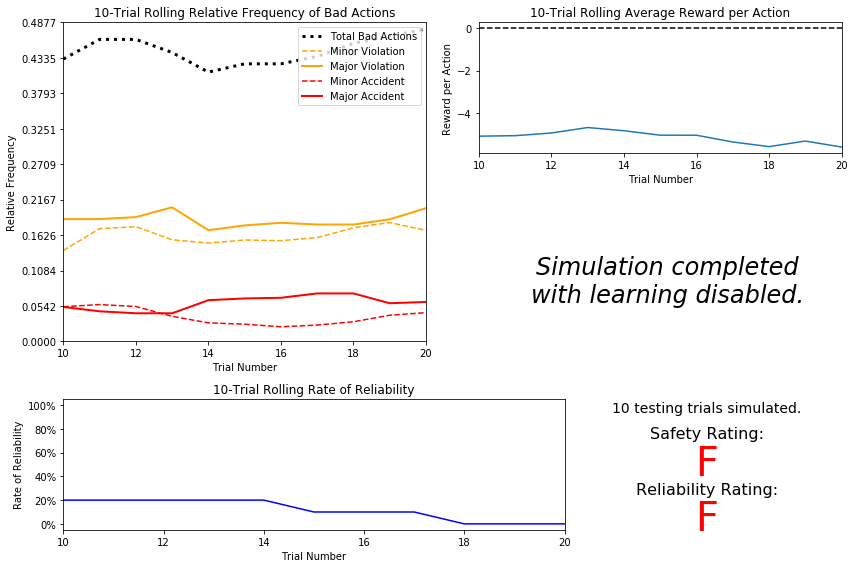

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:

The driving agent is making bad decisions 43 to 48% of the times.These bad decisions cause accidents 5% to 7.5% of the times.

The rolling rate of reliability falls drastically as the number of trails increase.It gets close to zero percent towards the end.Since the agent's driving is random, this makes perfect sense.

The rolling average rewards per action is net negative and it continues the downward trend with increasing trails.This indicates that the agent is penalized heavily.

Since the actions taken are random, the probability that the agent would do an appropriate action or cause a violation or accident is same.The rolling frequency of bad actions stays within a range.This indicates that the outcome of results dont change significantly.

This smartcab cannot be considered reliable or safe for its passengers.Each action it takes is random and is not decided based on current circumstances.The random action increases the probability for a violation or accident.


**

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:

'waypoint' and 'inputs' are relevant for both safety and efficiency.Waypoint indicates which direction the smartcab should head to.If we have to move in that direction safely, we would need the 'inputs' feature.We need the'light' feature to determine if the cab should move or stay in that place to remain safe.The 'oncoming' feature would help us determine if the cab can merge right in an intersection.'left' and 'right' features will be needed if we have to switch lanes or trying to turn to left from right lane or turn right from left lanes.

'deadline' feature simply indicates the number of actions that can be taken to reach the destination before the allotted time ends.The next safest action of the smartcab will be mostly dictated by current conditions.'deadline' may not help in this case.Efficiency can be ensured by setting up proper rewards for the next safest action when multiple potential paths are available.Hence 'deadline' feature may not be appropriate for modeling the environment.

**

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:

|attribute | No of possible values | values |
|:-----:	|:------:	|:-----------:	|
|waypoint|3|Right,left,forward|
|light|2|Green,red|
|left|4|None,Right,left,forward|
|right|4|None,Right,left,forward|
|oncoming|4|None,Right,left,forward|


The total Number of possible combinations is 3X2X4X4X4=384 states

Since there are 384 states, the driving agent could learn a policy for each of these states.

**

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

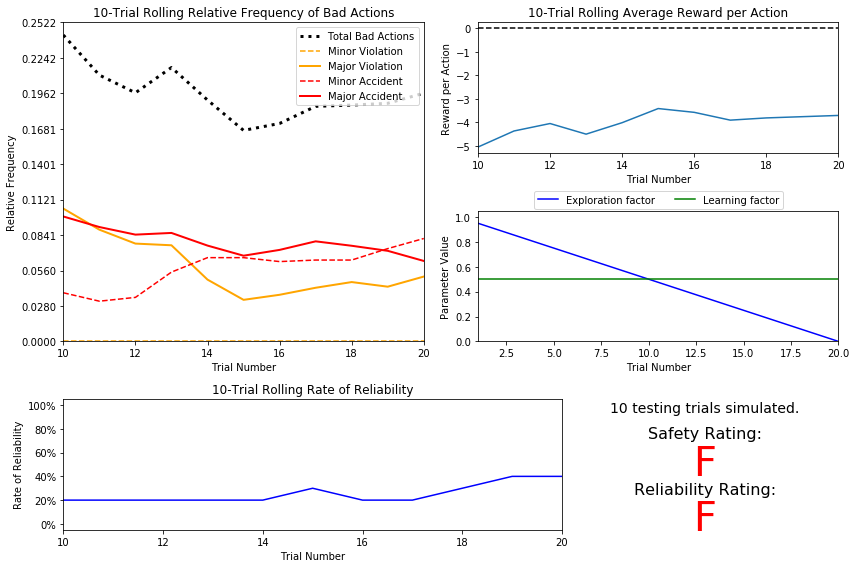

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:

The basic driving agent and the Q-learning agent doesnt have any similarities.For the basic driving agent, the violations kept increasing and the rewards kepy decreasing with the number of trails.However, for Q-learning agent , the violations kept decreasing and the rewards kept increasing.

Driving agent took around 20 trails before testing.At the start , epsilon was 1 and the decay rate was 0.05.Epsilon tolerance is 0.05.It takes 20 trails to reach the epsilon tolerance value.Hence the number makes sense.

The decaying function is accurately represented in the parameters panel.

As the training trails increased, bad actions started decreasing.Also, the average award also started increasing.

The safety and reliability rating hasn't improved.It is still at F.


**

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

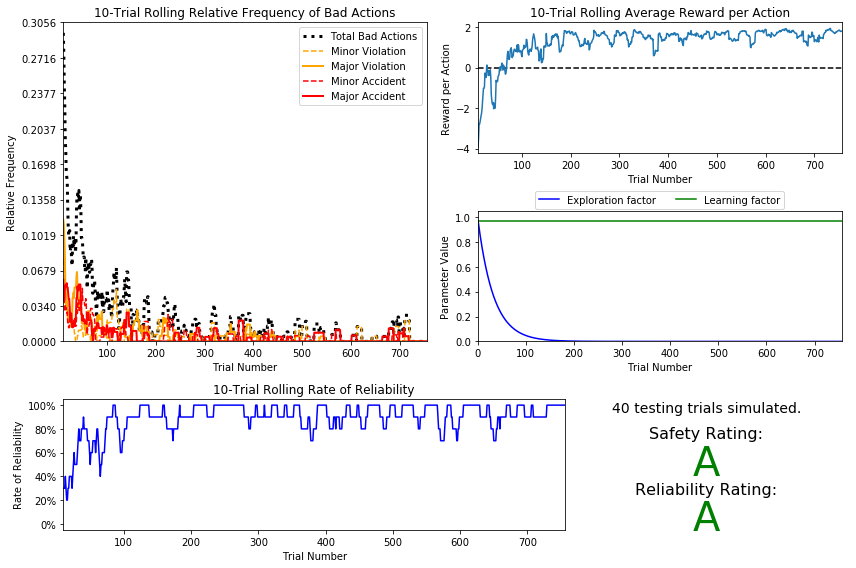

In [46]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:

I used a^t as my decaying function.a was set to 0.97.

The agent took approximately 750 training trails before it started testing.

I set the epsilon tolerance to 0.0000000001.This was done to increase the number of training trails the agent would go through before starting the testing.Since there are 384 possible states,I wanted the smart cab to go through close to twice the amount of training trails.Hence I chose that epsilon tolerance value.The learning rate was set to 0.97.This was done to increase the weight of the rewards for the actions.


Compared to the default Q-learner, the relative frequency of bad actions has come down and the rolling average rewards has remained in the positive region.Also, the testing trails got  A rating for safety and reliability, where as the default learner got 'F' rating.

Based on the relative frequency of bad actions and rolling average rewards, it seems the driving agent has learned an appropriate policy. 

Yes.Both Safety and Reliability rating is A.Am satisfied with the ratings.
**

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:

1.Optimal policy can be summarized as follows

|Waypoint | Light | left |right|oncoming|Optimal action|
|:-----:	|:------:	|:-----------:	|:-----:	|:------:	|:-----------:	|
|forward|Red|Any|Any|Any|None|
|forward|Green|Any|Any|Any|forward|
|Right|Red|Any|forward/left|forward|None|
|Right|Red|Any|right|Not forward|Right|
|Right|Green|Any|Any|Any|Right|
|Left|Red|Any|Any|Any|None|
|Left|Green|Not forward|Any|None|Left|
|Left|Green|Not forward|Any|forward|None|


2. Most states have the optimal policy.However some states do not have the optimal policy rewards.Please see examples below.

3. Example1:

(waypoint:'left', light:'red',left: None, right:'left',oncoming: 'right')

 -- forward : -8.78
 
 -- right : 0.00
 
 -- None : 2.77
 
 -- left : -39.56
 
 
 Since the light is red and the waypoint is left, the optimal policy for smartcab is to  not turn left and stay at its current position.In the Q-table, I see that the reward for moving left is -39.56 and the highest reward is for No action.This matches with the optimal policy
 
 
 Example2:
 
 (waypoint:'left', light:'green', left:'right', right:'forward', oncoming:'forward')
 
 -- forward : 0.00
 
 -- right : 0.46
 
 -- None : -3.93
 
 -- left : -19.86
 
 
 When the light is green and the waypoint is left, the optimal policy is not to turn left when there is an oncoming vehicle travelling forward.Also, since the light is green, the smartcab should also not be in stopped state.The reward for None and left are negative and they match the optimal policy.
 
 4.
 
 Here is an example where the smartcab hasn't learned the optimal policy.
 
 (waypoint: 'left', 'green', 'left', 'right', 'left')
 
 -- forward : 0.00
 
 -- right : 0.93
 
 -- None : 0.00
 
 -- left : 0.00
 
In this case, the cab should be turning left.The light is green and the oncoming vehicle is turning left.The optimal action in this case should be turning left.There is no reward for turning left in this case.Turning right has a reward of 0.93.

Initially rewards for all actions is set to 0.When this state was first reached, the action to be taken would have been selected in random.This random action would have been 'right'.Since this action wouldnt have caused any violation, based on the learning rate, the reward could have been set to 0.93.The agent might not have reached this state again during the training trails.Hence the agent might not havr reached the optimal policy for this state.
** 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.